In [334]:
#importing all the required libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime, sys
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib.pyplot import xticks
from scipy.stats import skew
import os
import warnings
warnings.filterwarnings('ignore')

In [335]:
path ='' 
files = glob.glob("*.csv")
tennis_df = pd.concat((pd.read_csv(f) for f in files))
tennis_df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2001-301,Auckland,Hard,32,A,20010108,1,102905,NaN,NaN,Stefan Koubek,L,175.0,AUT,24.016427,102644,1.0,NaN,Franco Squillari,L,183.0,ARG,25.382615,7-6(4) 6-2,3,R32,84.0,5.0,2.0,93.0,58.0,38.0,17.0,10.0,14.0,16.0,5.0,5.0,66.0,31.0,19.0,15.0,10.0,4.0,8.0,52.0,755.0,14.0,1598.0
1,2001-301,Auckland,Hard,32,A,20010108,2,102231,NaN,NaN,Alex Calatrava,R,190.0,ESP,27.570157,102860,NaN,NaN,Agustin Calleri,R,183.0,ARG,24.317591,6-3 1-6 6-3,3,R32,78.0,6.0,2.0,74.0,47.0,36.0,14.0,13.0,0.0,2.0,14.0,3.0,63.0,37.0,33.0,11.0,12.0,1.0,3.0,53.0,751.0,64.0,633.0
2,2001-301,Auckland,Hard,32,A,20010108,3,102257,NaN,WC,Greg Rusedski,L,193.0,GBR,27.340178,103066,NaN,WC,Mark Nielsen,R,185.0,NZL,23.252567,6-4 6-4,3,R32,87.0,15.0,5.0,64.0,36.0,29.0,17.0,10.0,4.0,4.0,1.0,5.0,72.0,45.0,31.0,12.0,10.0,4.0,6.0,73.0,575.0,260.0,129.0
3,2001-301,Auckland,Hard,32,A,20010108,4,101647,5.0,NaN,Byron Black,R,175.0,ZIM,31.258042,102287,NaN,NaN,Albert Portas,R,188.0,ESP,27.148528,2-6 6-2 6-4,3,R32,81.0,1.0,1.0,72.0,52.0,34.0,11.0,13.0,2.0,5.0,15.0,0.0,69.0,35.0,31.0,11.0,13.0,3.0,7.0,35.0,965.0,49.0,760.0
4,2001-301,Auckland,Hard,32,A,20010108,5,102998,3.0,NaN,Jan Michael Gambill,R,190.0,USA,23.600274,103454,NaN,NaN,Nicolas Massu,R,183.0,CHI,21.248460,7-6(4) 6-4,3,R32,103.0,15.0,5.0,67.0,33.0,27.0,14.0,11.0,1.0,4.0,8.0,6.0,81.0,40.0,27.0,15.0,11.0,5.0,9.0,33.0,1030.0,67.0,601.0


In [336]:
tennis_df.size

2929661

In [337]:
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]
tennis_df.info

<bound method DataFrame.info of      tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0      2001-301     Auckland    Hard         32             A      20010108   
1      2001-301     Auckland    Hard         32             A      20010108   
2      2001-301     Auckland    Hard         32             A      20010108   
3      2001-301     Auckland    Hard         32             A      20010108   
4      2001-301     Auckland    Hard         32             A      20010108   
...         ...          ...     ...        ...           ...           ...   
1457  2020-7485      Antwerp    Hard         32             A      20201019   
1458  2020-7485      Antwerp    Hard         32             A      20201019   
1459  2020-7485      Antwerp    Hard         32             A      20201019   
1460  2020-7485      Antwerp    Hard         32             A      20201019   
1461  2020-7485      Antwerp    Hard         32             A      20201019   

      match_num  wi

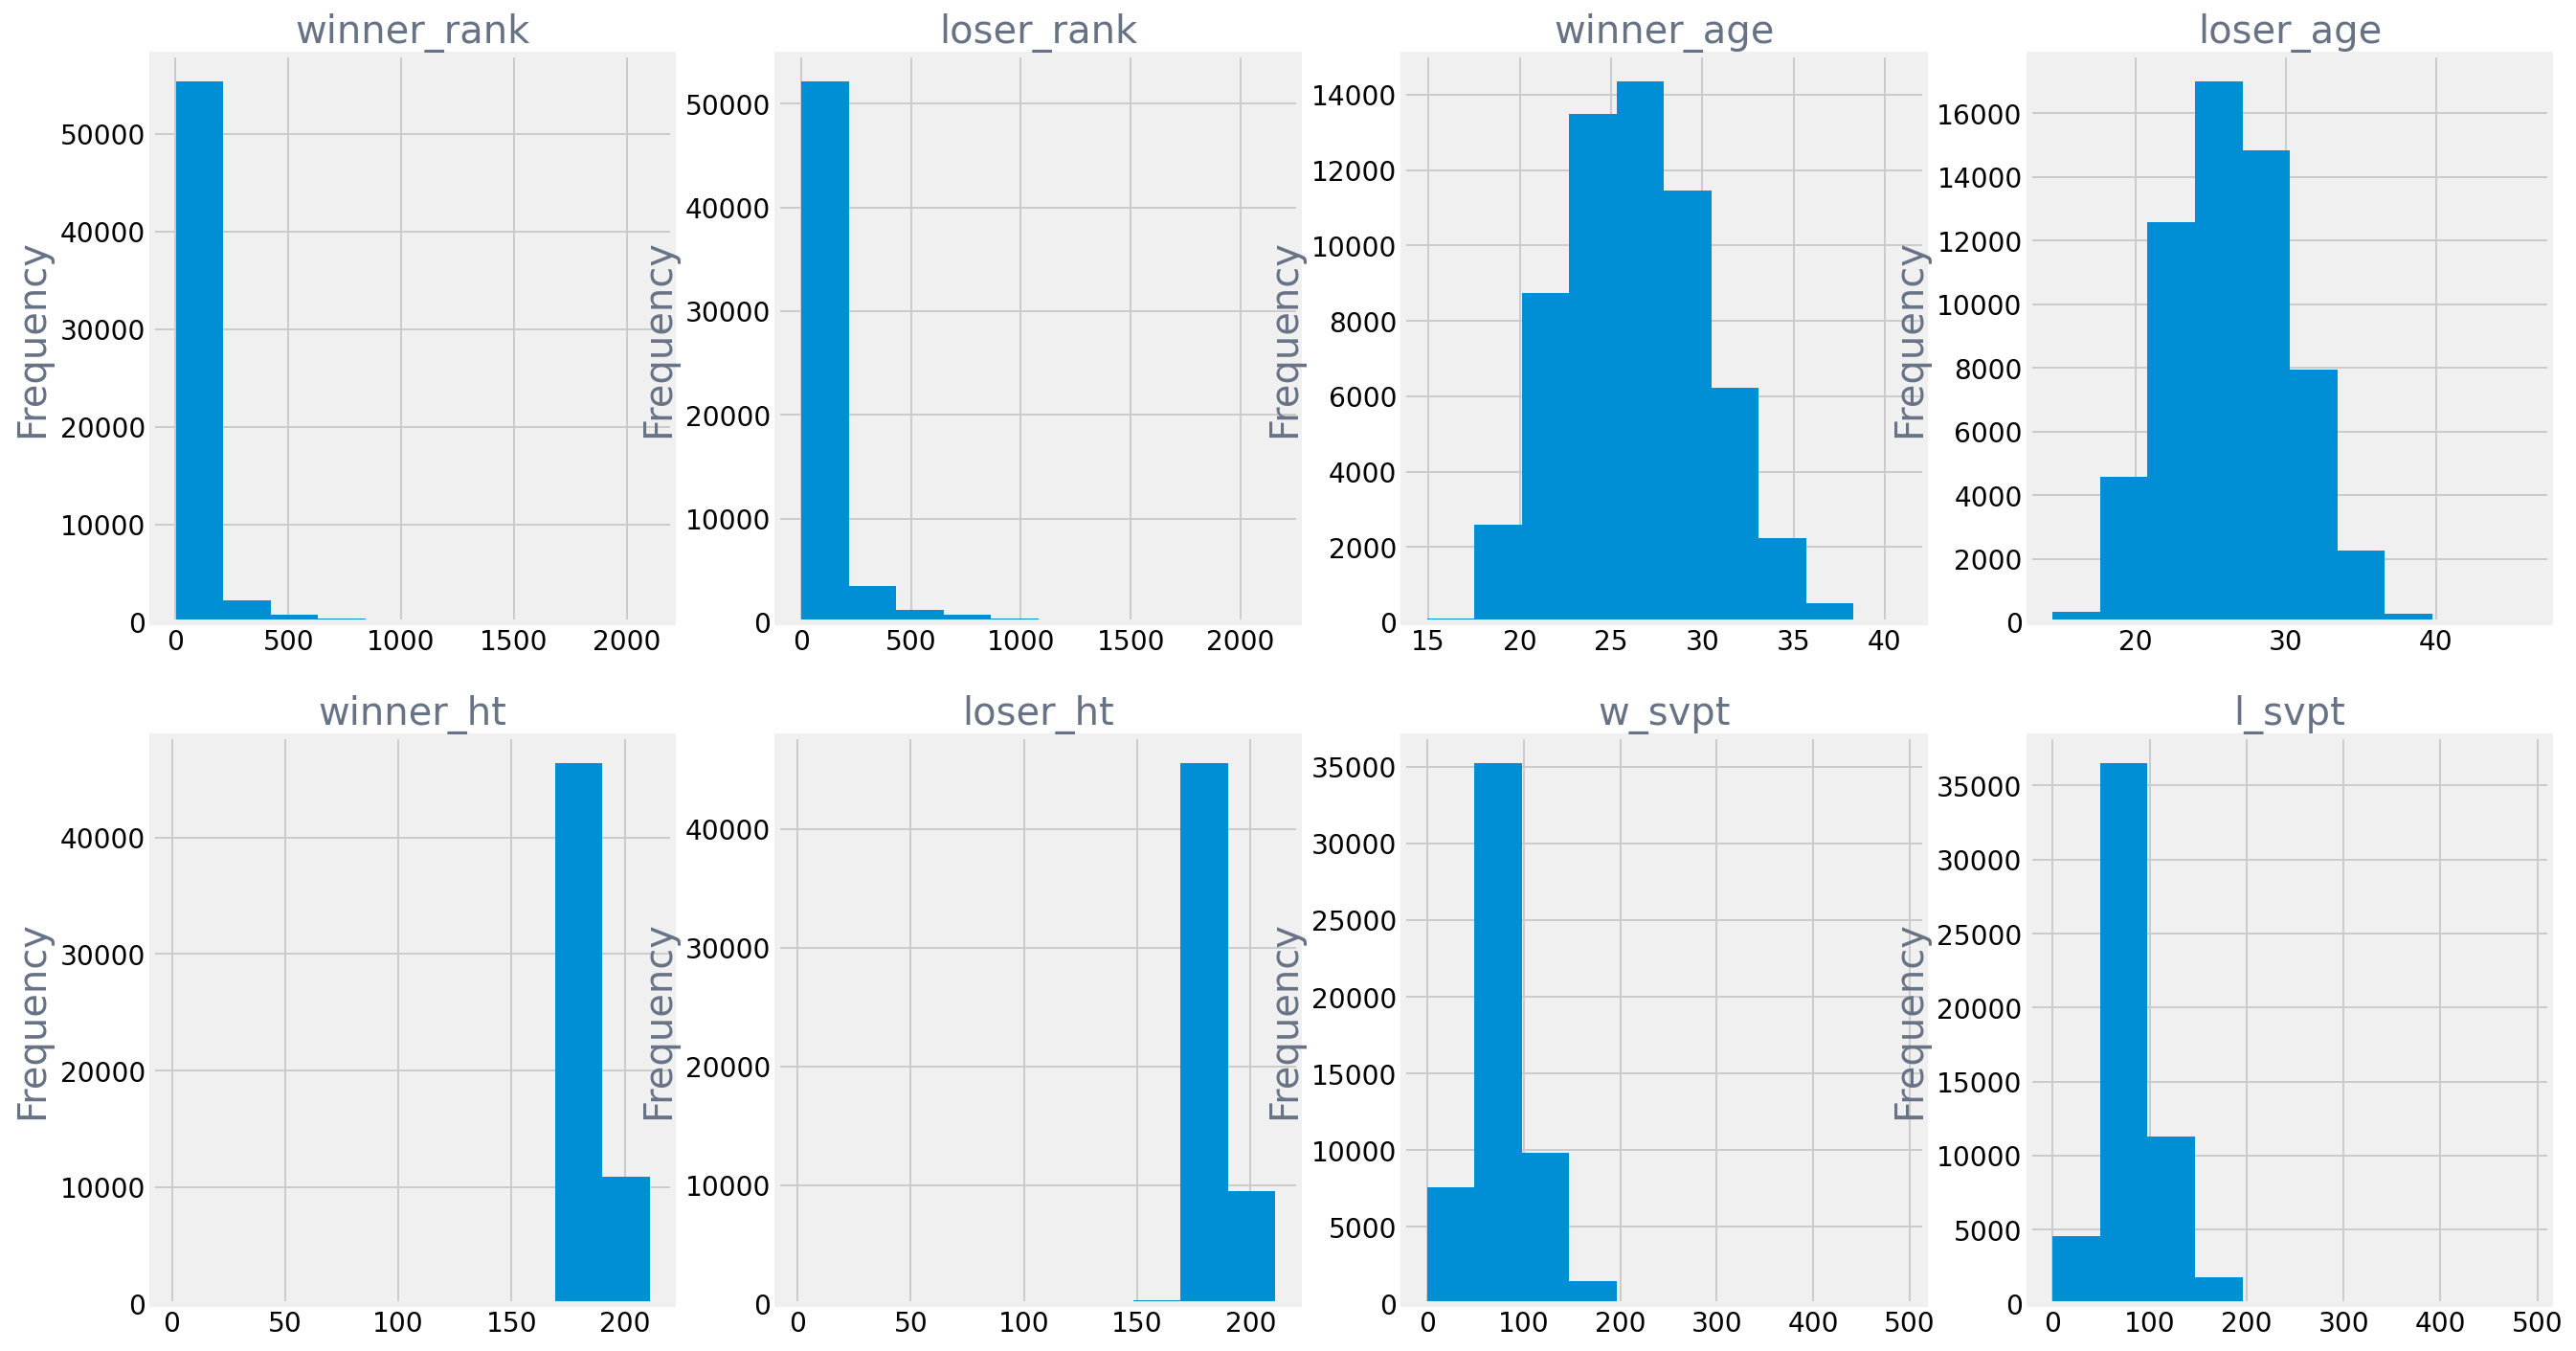

In [338]:
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht',
'loser_ht','w_svpt','l_svpt']
plt.figure(1, figsize=(20,12))
for i in range(1,9):
    plt.subplot(2,4,i)
    tennis_df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

[Text(0.5, 0, 'Surface'), Text(0, 0.5, 'Aces')]

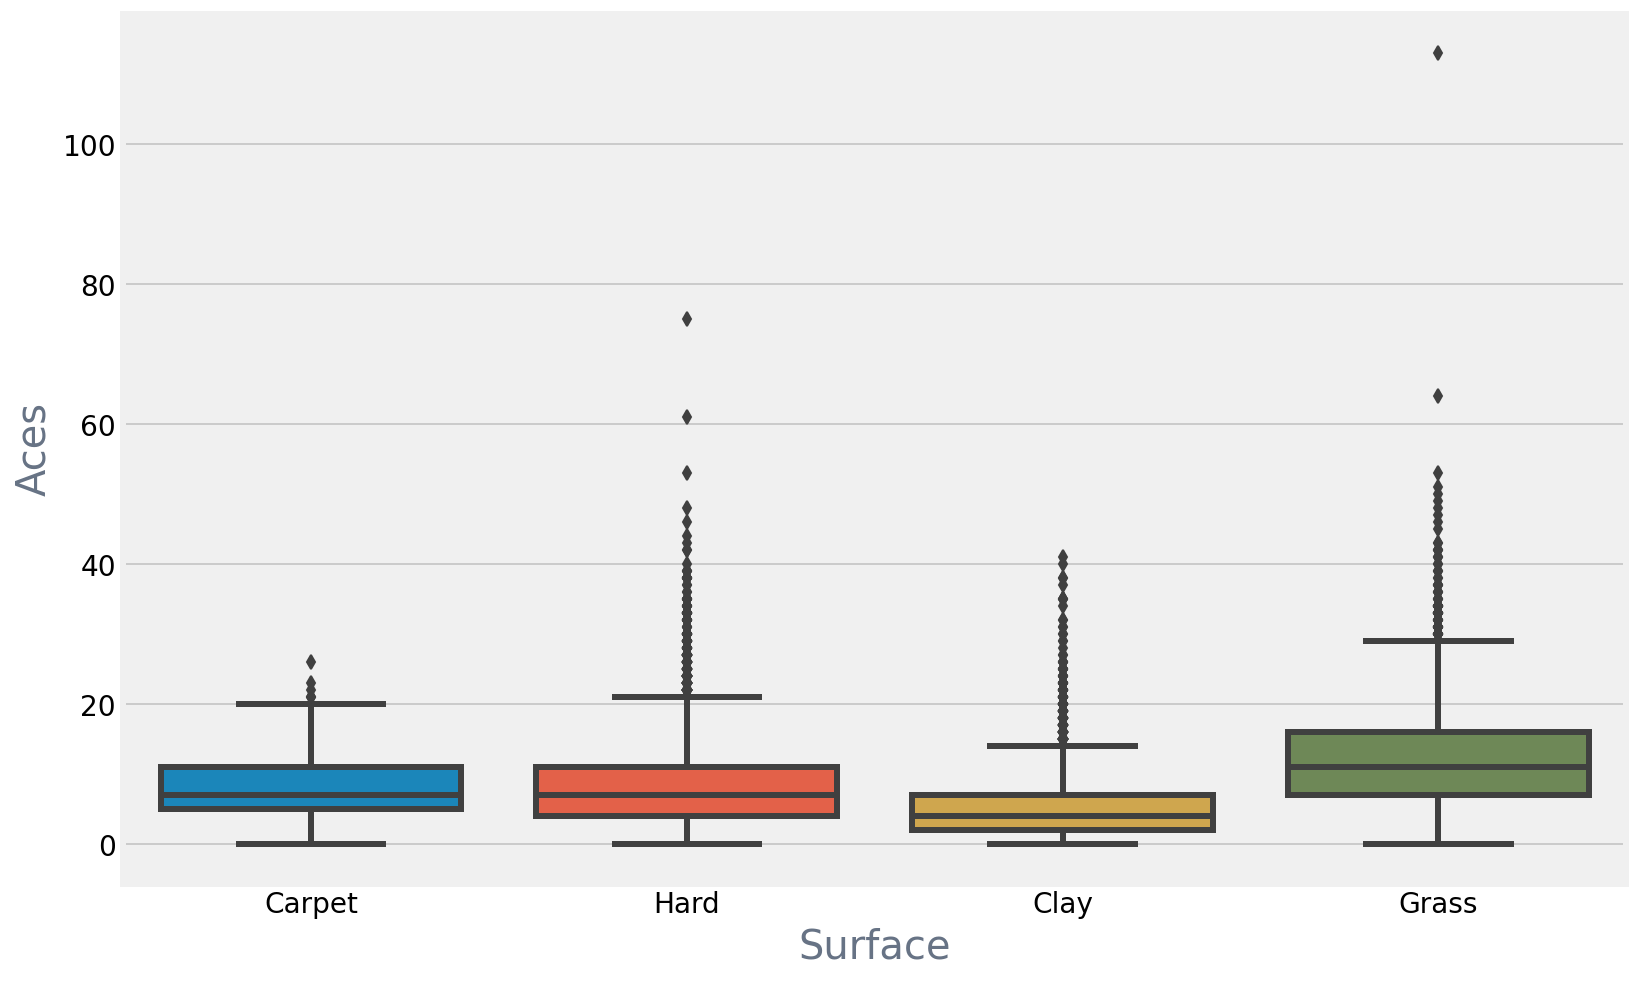

In [339]:
tennis_df_h = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['G','M'])) ].copy()
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')

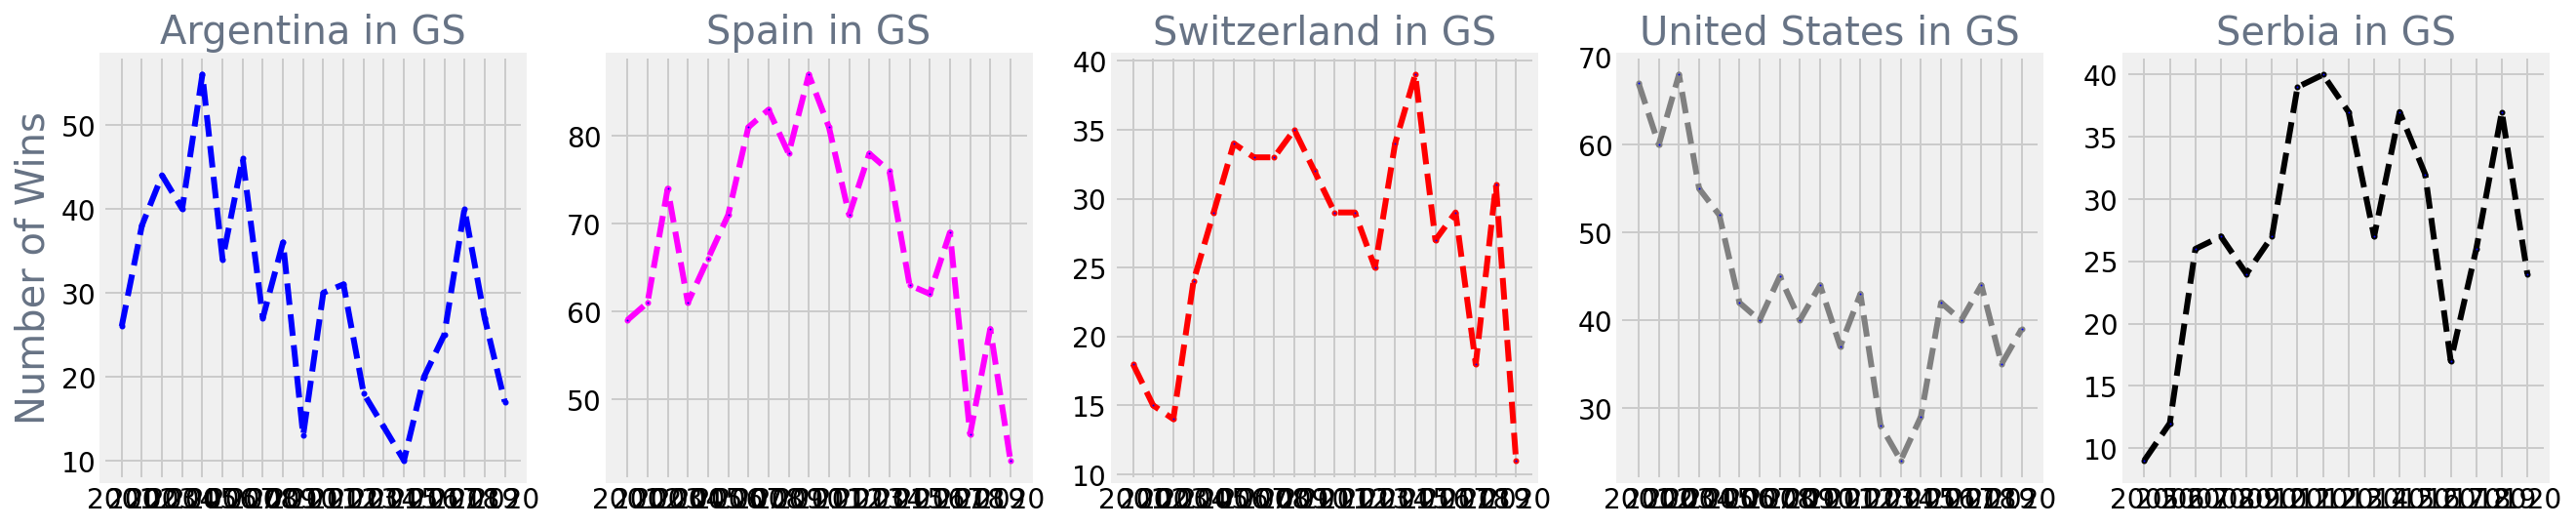

In [340]:
plt.figure(figsize=(20,4))

countries = {'ARG':'Argentina','ESP':'Spain','SUI':'Switzerland','USA':'United States','SRB':'Serbia'}
colors = ['blue','magenta','red','grey','black']

i=1
for k,v in countries.items():
    plt.subplot(1,5,i)
    s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin([k]))].groupby(['tourney_year','winner_ioc'], as_index=False).agg('count')
    plt.plot(s['tourney_year'], s['tourney_id'], color=colors[i-1], linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
    if i==1:
        plt.ylabel('Number of Wins')
    plt.title(v+' in GS')
    i=i+1

<AxesSubplot:title={'center':'Players with Most Aces'}, ylabel='Player'>

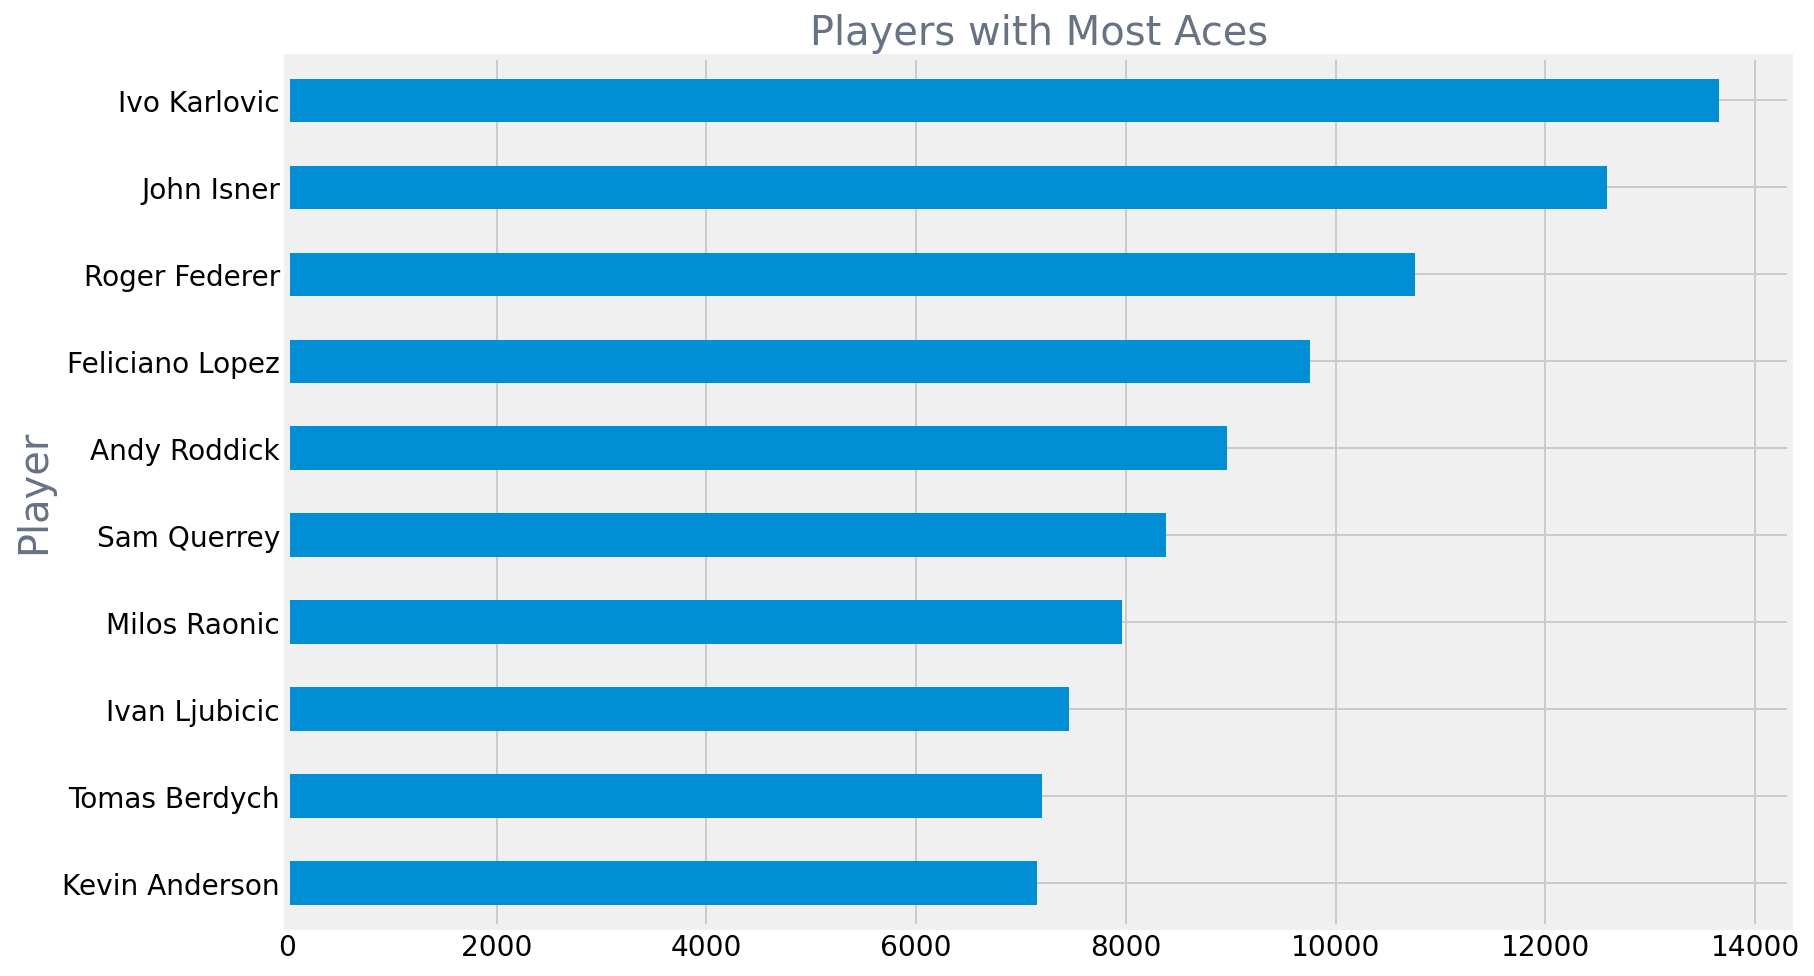

In [341]:
# Create dataframe with details on aces by winners of each match
sw = tennis_df.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
# Create dataframe with details on aces by losers of each match
sl = tennis_df.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
# Concatenate dataframes
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
# Derive new column with total number of aces
r['aces'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)
final.plot('Player','Aces', kind='barh', title='Players with Most Aces', legend=False)

<AxesSubplot:title={'center':'Unique # of Players that Won GS and Masters Finals'}, xlabel='Year'>

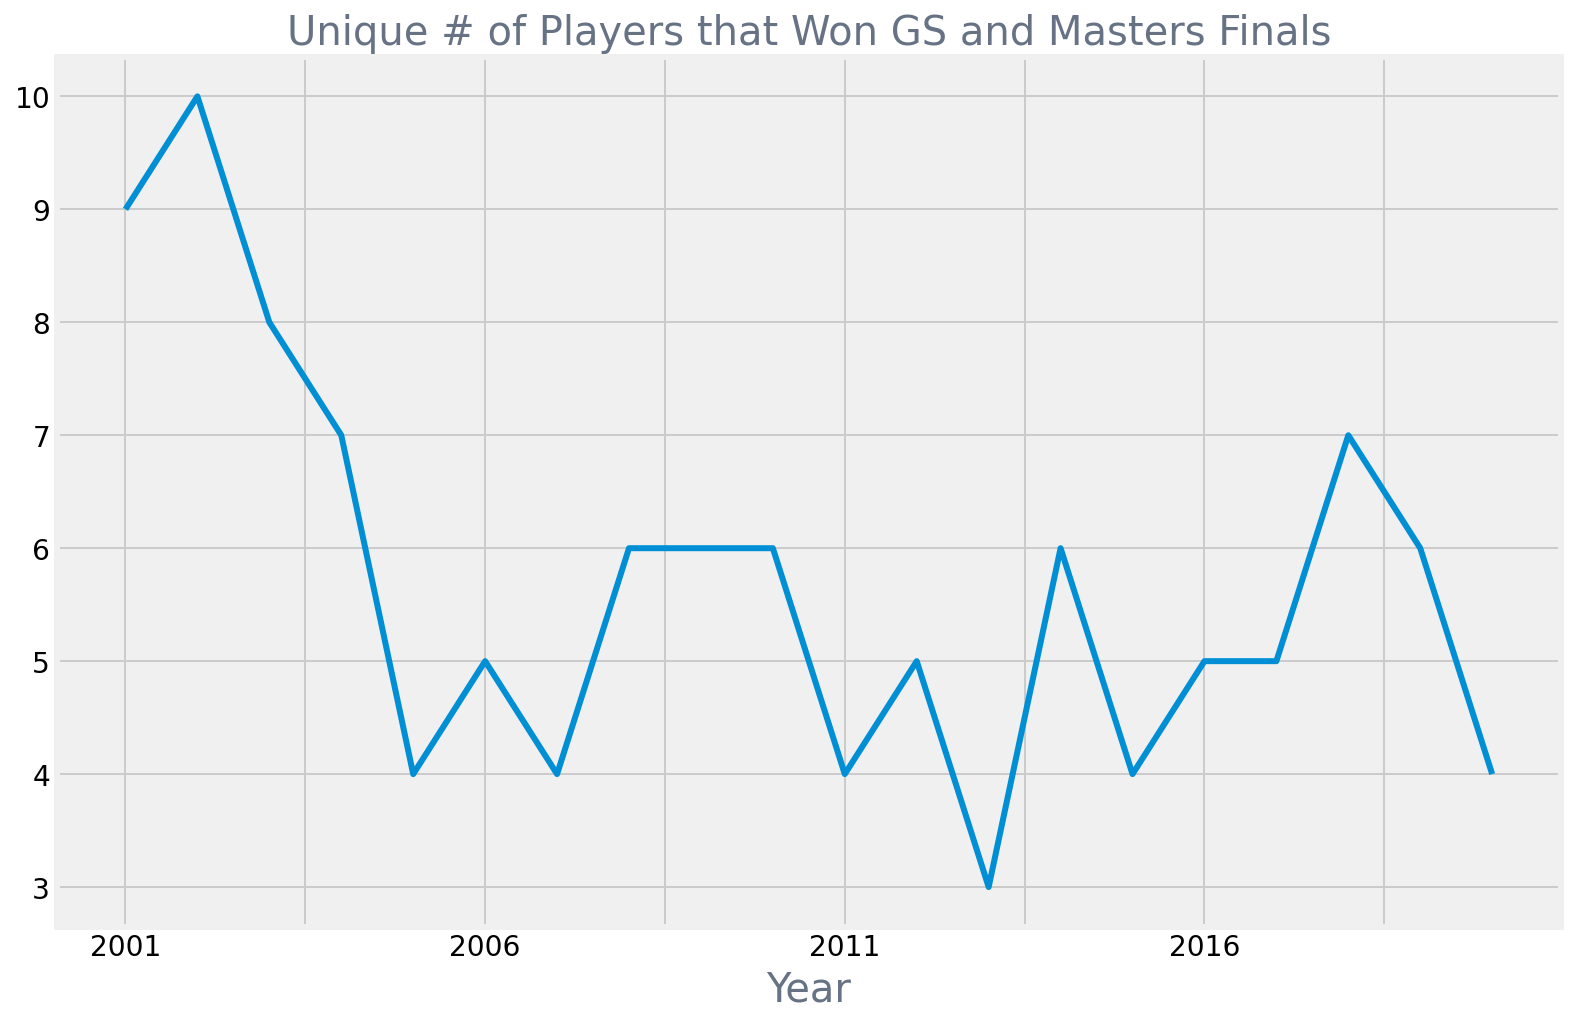

In [342]:
# Unique number of players that won GS and Masters per year 
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))].groupby(['tourney_year']).agg({'winner_name':'nunique'})
t= s.reset_index()
t.columns=['Year','Unique_Winners']
t.plot('Year', 'Unique_Winners', kind='line', title='Unique # of Players that Won GS and Masters Finals', legend=False)

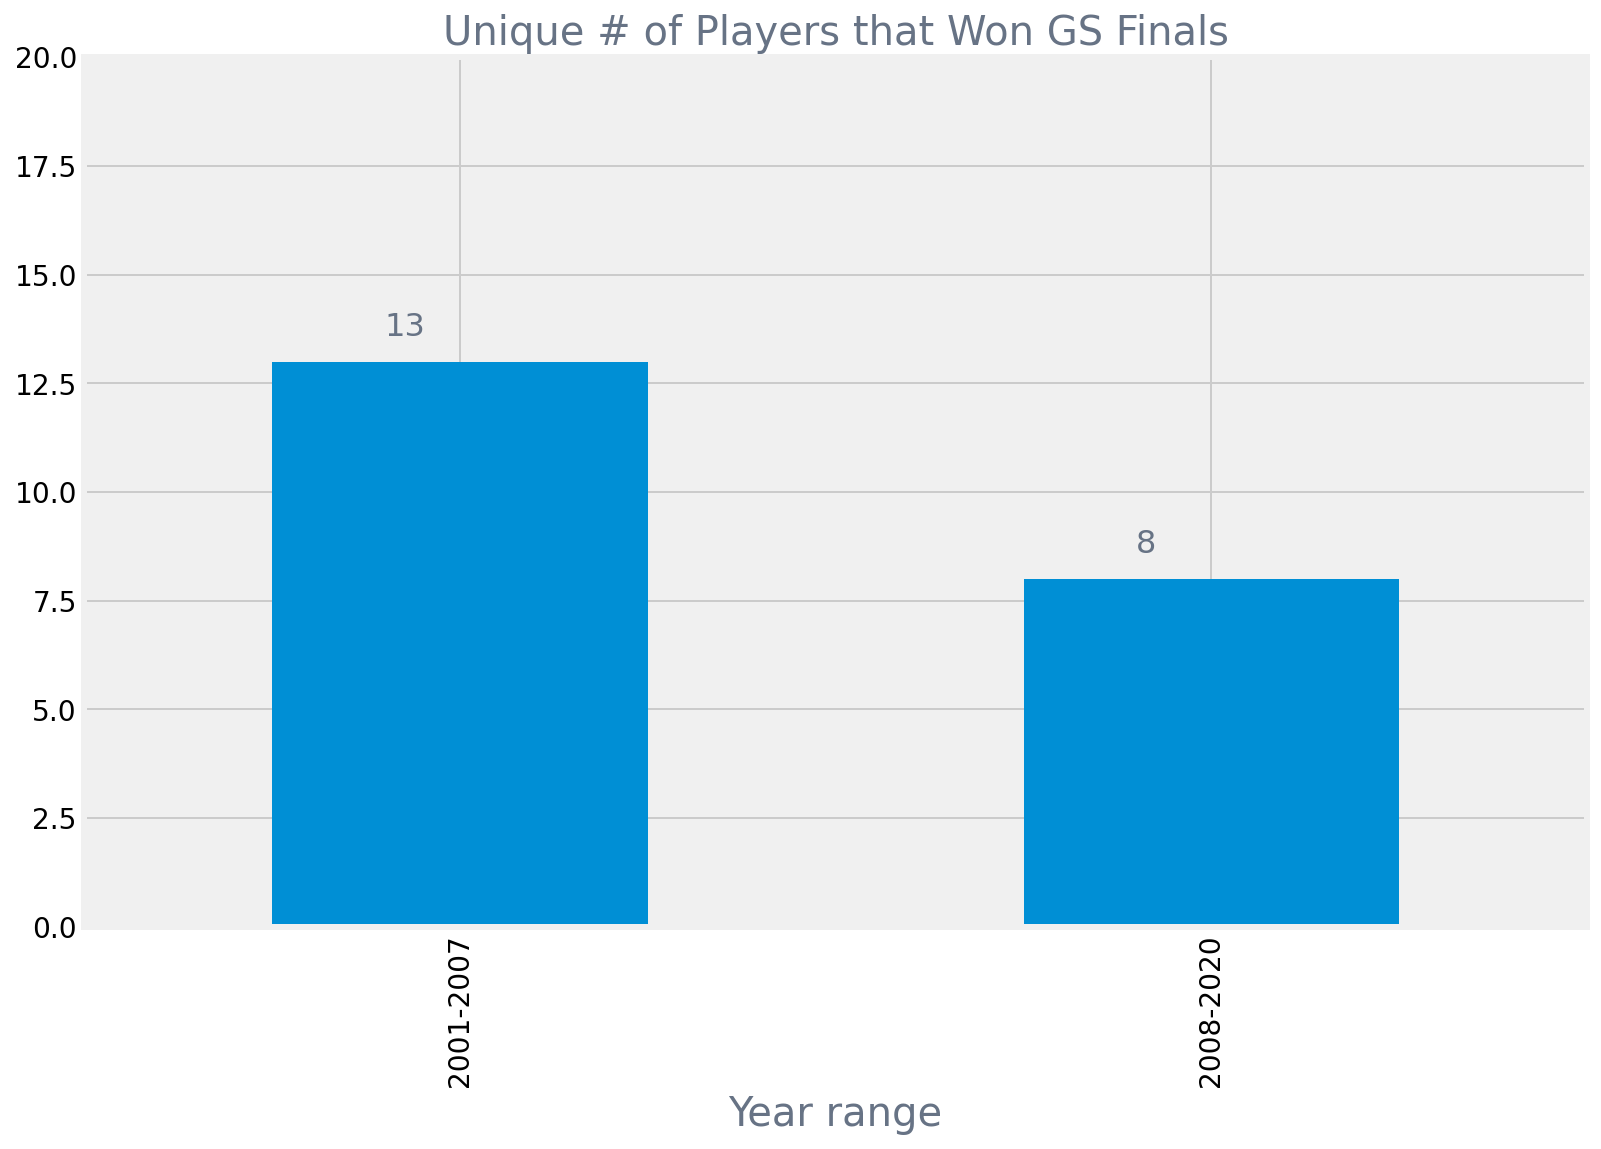

In [343]:
# Unique number of players that won GS and Masters per period 
u = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('2001','2007'))].agg({'winner_name':'nunique'})
v = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['G']))&(tennis_df['tourney_year'].between('2008','2020'))].agg({'winner_name':'nunique'})

u['2001-2007'] = u['winner_name']
u=u.drop('winner_name')
v['2008-2020'] = v['winner_name']
v=v.drop('winner_name')

dfl = [u,v]
dfs = pd.concat(dfl)

x=pd.DataFrame(dfs, columns=['Unique_Count']).reset_index()
x.columns=['Year range','Unique winners']

ax=x.plot('Year range', 'Unique winners', kind='bar', title='Unique # of Players that Won GS Finals', legend=False)
ax.set_ylim(0,20)

for i, v in enumerate(x['Unique winners']):
    ax.text(i-0.1, v+0.6, str(v))

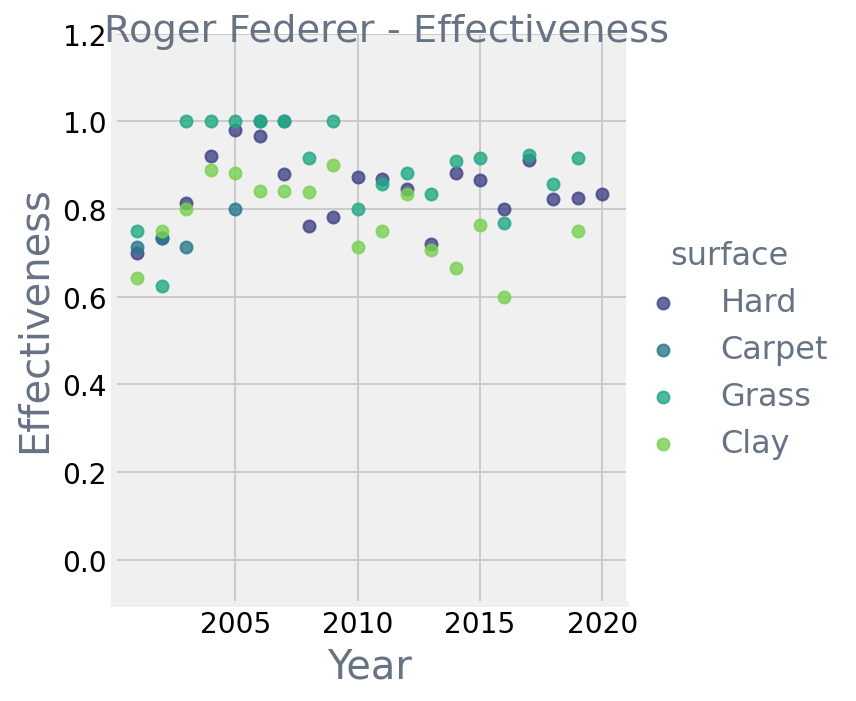

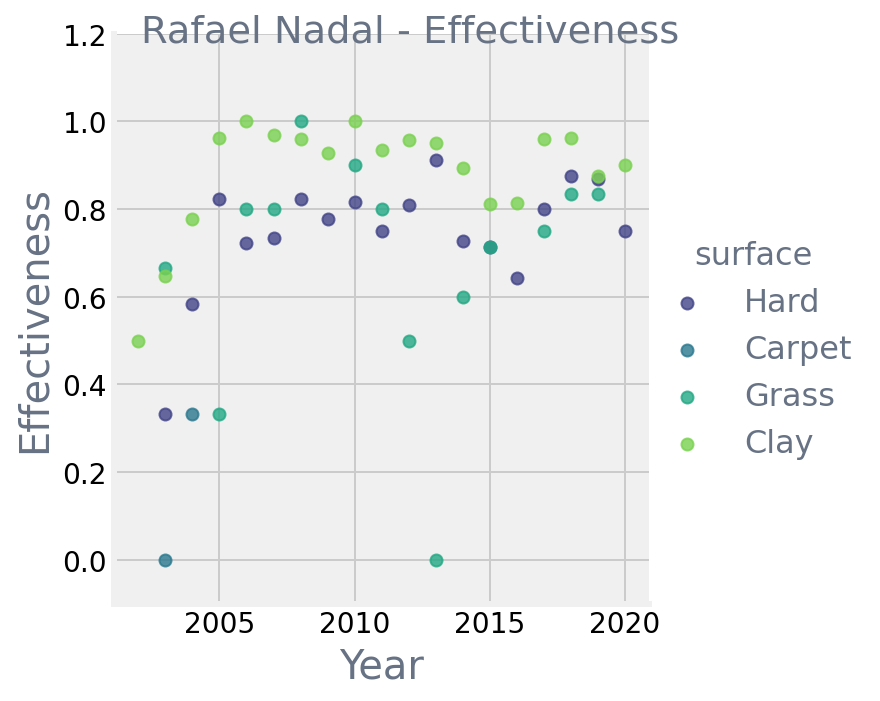

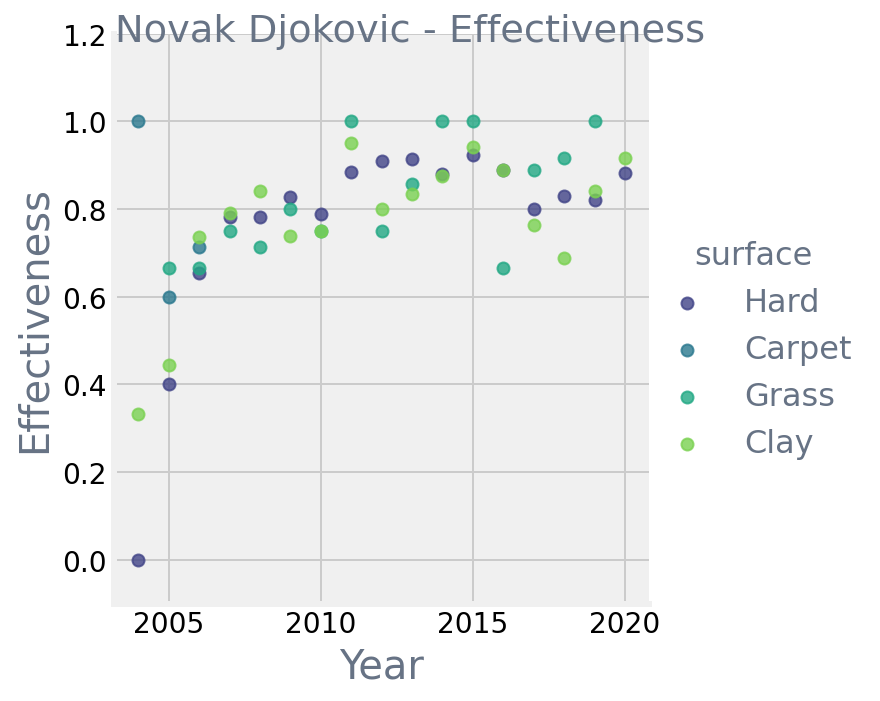

In [344]:
# Function to plot effectiveness of a player
def plot_effectiveness(player):
    
    pw = tennis_df[(tennis_df['winner_name'] == player)].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
    pww = pw['tourney_id'].reset_index()
    pl = tennis_df[(tennis_df['loser_name'] == player)].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
    pll = pl['tourney_id'].reset_index()
    pww.columns = ['tourney_year','surface','wins']
    pll.columns = ['tourney_year','surface','loses']
    
    dfs = (pww,pll)
    dfs_concat = pd.concat(dfs)
    dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()
    dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
    dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)
    
    g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
    g.fig.suptitle(player + ' - Effectiveness')
    g.set(xlabel='Year', ylabel='Effectiveness')
    g.set(ylim=(-0.1,1.2))

plot_effectiveness('Roger Federer')
plot_effectiveness('Rafael Nadal')
plot_effectiveness('Novak Djokovic')

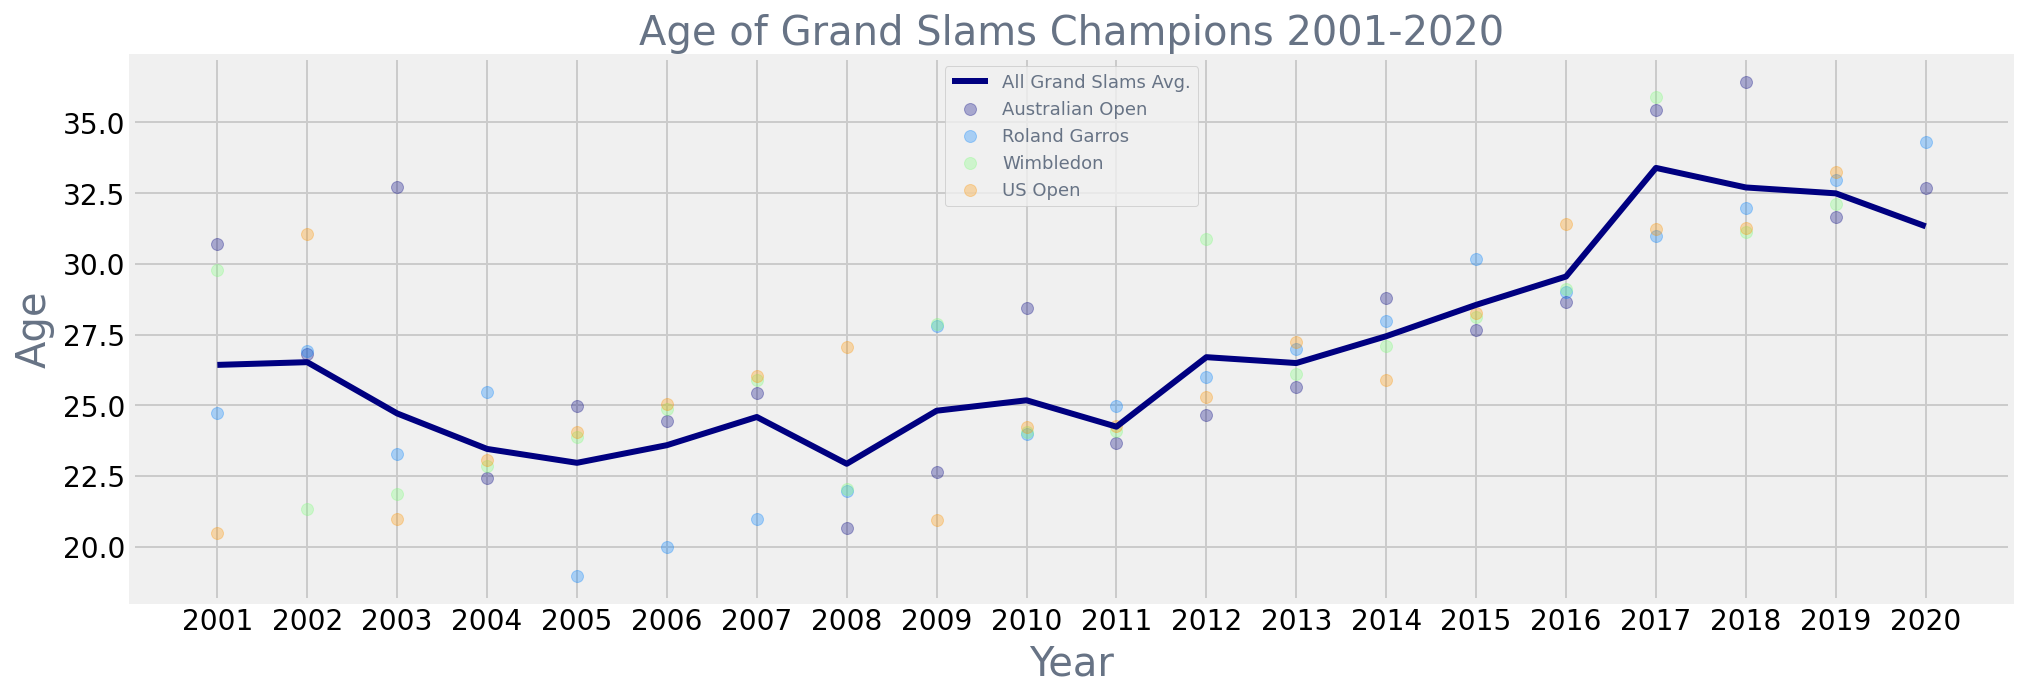

In [412]:
# Create dataframe with age of winners filtering Grand Slam finals
tennis_df_win=tennis_df[tennis_df['tourney_level'].isin(['G'])&(tennis_df['round']=='F')].dropna(subset=['winner_age'])
dfw = tennis_df_win[['tourney_year','tourney_name','winner_name','winner_age']]
dfw.columns = ['tourney_year','tourney_name','player','age']

dfs_final = dfw.groupby(['tourney_year','tourney_name']).agg({'age':'mean'}).reset_index()
dfs_final_2 = dfs_final.groupby(['tourney_year']).agg({'age':'mean'}).reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Age of Grand Slams Champions 2001-2020')
plt.ylabel('Age')
plt.xlabel('Year')
plt.plot(dfs_final_2['tourney_year'], dfs_final_2['age'])
plt.scatter(dfs_final[dfs_final['tourney_name']=='Australian Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Australian Open']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Roland Garros']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Roland Garros']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Wimbledon']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Wimbledon']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='US Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='US Open']['age'], alpha=0.3)
plt.legend(['All Grand Slams Avg.','Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], loc='upper center',prop={'size': 9})

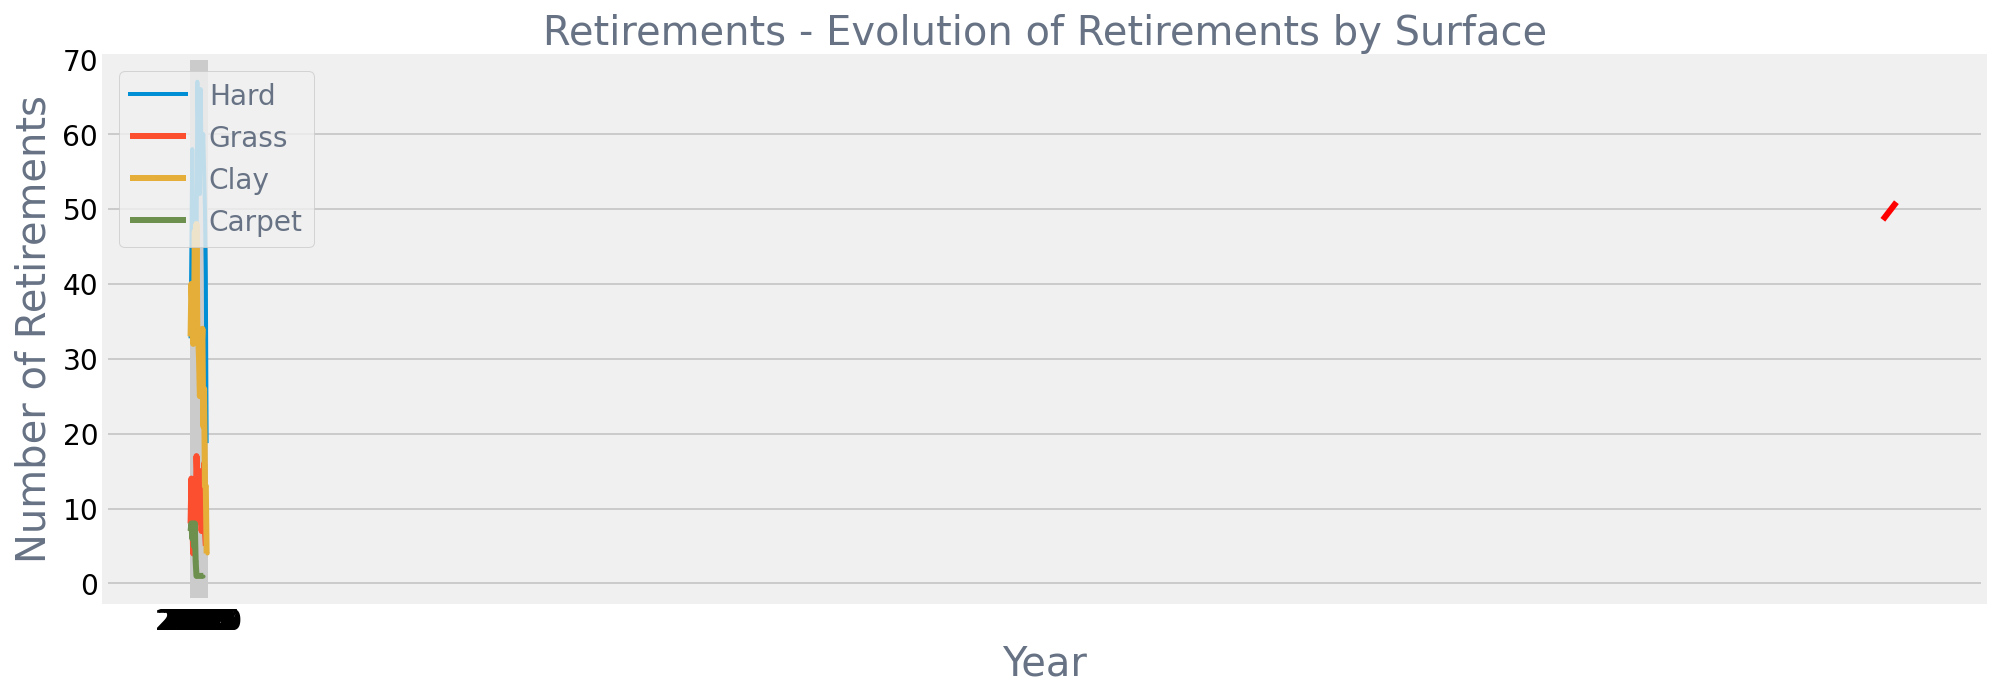

In [346]:
# Extract retirements
ret_df = tennis_df[tennis_df['score'].str.contains("RET")==True][['tourney_year','tourney_level','surface','tourney_id','winner_name']]
ref_df_f = ret_df.groupby(['tourney_year','surface'], as_index=False).agg('count')

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(111)
plt.style.use('seaborn-colorblind')
plt.title('Retirements - Evolution of Retirements by Surface')
plt.ylabel('Number of Retirements')
plt.xlabel('Year')

plt.plot(ref_df_f[ref_df_f['surface']=='Hard']['tourney_year'], ref_df_f[ref_df_f['surface']=='Hard']['tourney_id'], linestyle='solid', linewidth=2, solid_capstyle='projecting')
plt.plot(ref_df_f[ref_df_f['surface']=='Grass']['tourney_year'], ref_df_f[ref_df_f['surface']=='Grass']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['surface']=='Clay']['tourney_year'], ref_df_f[ref_df_f['surface']=='Clay']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)
plt.plot(ref_df_f[ref_df_f['surface']=='Carpet']['tourney_year'], ref_df_f[ref_df_f['surface']=='Carpet']['tourney_id'], linestyle='solid', marker='o', markerfacecolor='black', markersize=1, linewidth=3)

# Calc the trendline for hard court
x = ref_df_f[ref_df_f['surface']=='Hard']['tourney_year'].astype(int)
y = ref_df_f[ref_df_f['surface']=='Hard']['tourney_id'].astype(int)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--", alpha=1.0)
plt.legend(['Hard', 'Grass', 'Clay', 'Carpet'], loc='upper left', prop={'size': 14})

In [347]:
%matplotlib inline
plt.style.use('fivethirtyeight')
cols = [
    'tourney_id', 
    'tourney_name', 
    'surface', 
    'draw_size', 
    'tourney_level',
    'tourney_date', 
    'match_num', 
    'winner_id', 
    'winner_seed', 
    'winner_entry',
    'winner_name',
    'winner_hand', 
    'winner_ht', 
    'winner_ioc', 
    'winner_age', 
    'winner_rank', 
    'winner_rank_points', 
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score',
    'best_of', 
    'round',
    'minutes', 
    'w_ace', 
    'w_df', 
    'w_svpt',
    'w_1stIn', 
    'w_1stWon', 
    'w_2ndWon',
    'w_SvGms', 
    'w_bpSaved', 
    'w_bpFaced',
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

In [348]:
ltennis=pd.DataFrame(tennis_df,
                  columns=cols)
ltennis.tail(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1457,2020-7485,Antwerp,Hard,32,A,20201019,125,105554,NaN,NaN,Daniel Evans,R,175.0,GBR,30.409309,35.0,1384.0,106099,NaN,Q,Salvatore Caruso,R,185.0,ITA,27.843943,79.0,802.0,6-2 3-6 6-3,3,R32,115.0,9.0,2.0,70.0,47.0,36.0,14.0,13.0,1.0,3.0,4.0,1.0,77.0,43.0,31.0,14.0,13.0,3.0,7.0
1458,2020-7485,Antwerp,Hard,32,A,20201019,126,200267,NaN,WC,Zizou Bergs,R,NaN,BEL,21.379877,528.0,58.0,105077,NaN,NaN,Albert Ramos,L,188.0,ESP,32.755647,45.0,1165.0,7-5 7-5,3,R32,102.0,7.0,2.0,77.0,54.0,33.0,13.0,12.0,6.0,9.0,1.0,3.0,66.0,45.0,27.0,10.0,12.0,4.0,9.0
1459,2020-7485,Antwerp,Hard,32,A,20201019,128,126203,7.0,NaN,Taylor Fritz,R,193.0,USA,22.976044,28.0,1670.0,124187,NaN,NaN,Reilly Opelka,R,211.0,USA,23.143053,33.0,1402.0,7-6(5) 6-1,3,R32,67.0,10.0,1.0,59.0,44.0,39.0,6.0,10.0,0.0,0.0,19.0,3.0,58.0,37.0,30.0,5.0,9.0,3.0,5.0
1460,2020-7485,Antwerp,Hard,32,A,20201019,129,144750,NaN,Q,Lloyd Harris,R,193.0,RSA,23.649555,90.0,748.0,144895,NaN,NaN,Corentin Moutet,L,178.0,FRA,21.503080,74.0,838.0,7-5 6-2,3,R32,84.0,7.0,2.0,49.0,33.0,28.0,11.0,10.0,1.0,2.0,0.0,2.0,62.0,45.0,29.0,5.0,10.0,7.0,11.0
1461,2020-7485,Antwerp,Hard,32,A,20201019,130,200005,NaN,NaN,Ugo Humbert,L,188.0,FRA,22.316222,38.0,1306.0,106293,NaN,WC,Kimmer Coppejans,R,180.0,BEL,26.696783,172.0,353.0,6-4 6-3,3,R32,73.0,3.0,2.0,53.0,26.0,24.0,17.0,10.0,3.0,3.0,2.0,0.0,49.0,32.0,26.0,7.0,9.0,2.0,4.0


In [349]:
ltennis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59789 entries, 0 to 1461
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          59789 non-null  object 
 1   tourney_name        59789 non-null  object 
 2   surface             59789 non-null  object 
 3   draw_size           59789 non-null  int64  
 4   tourney_level       59789 non-null  object 
 5   tourney_date        59789 non-null  int64  
 6   match_num           59789 non-null  int64  
 7   winner_id           59789 non-null  int64  
 8   winner_seed         24962 non-null  float64
 9   winner_entry        7316 non-null   object 
 10  winner_name         59789 non-null  object 
 11  winner_hand         59782 non-null  object 
 12  winner_ht           57587 non-null  float64
 13  winner_ioc          59789 non-null  object 
 14  winner_age          59787 non-null  float64
 15  winner_rank         59308 non-null  float64
 16  winne

In [350]:
ltennis['tourney_date'] = pd.to_datetime(ltennis.tourney_date, format='%Y%m%d')
ltennis = ltennis.sort_values(['tourney_date'])
ltennis['tourney_yearmonth'] = ltennis.tourney_date.astype(str).str[:6]
ltennis['tourney_year'] = ltennis.tourney_date.astype(str).str[:4]
ltennis['tourney_year'] = ltennis['tourney_year'].astype(int)
ltennis_country= ltennis[['winner_ioc','tourney_level','round']]
ltennis_country = ltennis_country[(ltennis_country.tourney_level == 'G')]
ltennis_country.count()

winner_ioc       10033
tourney_level    10033
round            10033
dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Wins')]

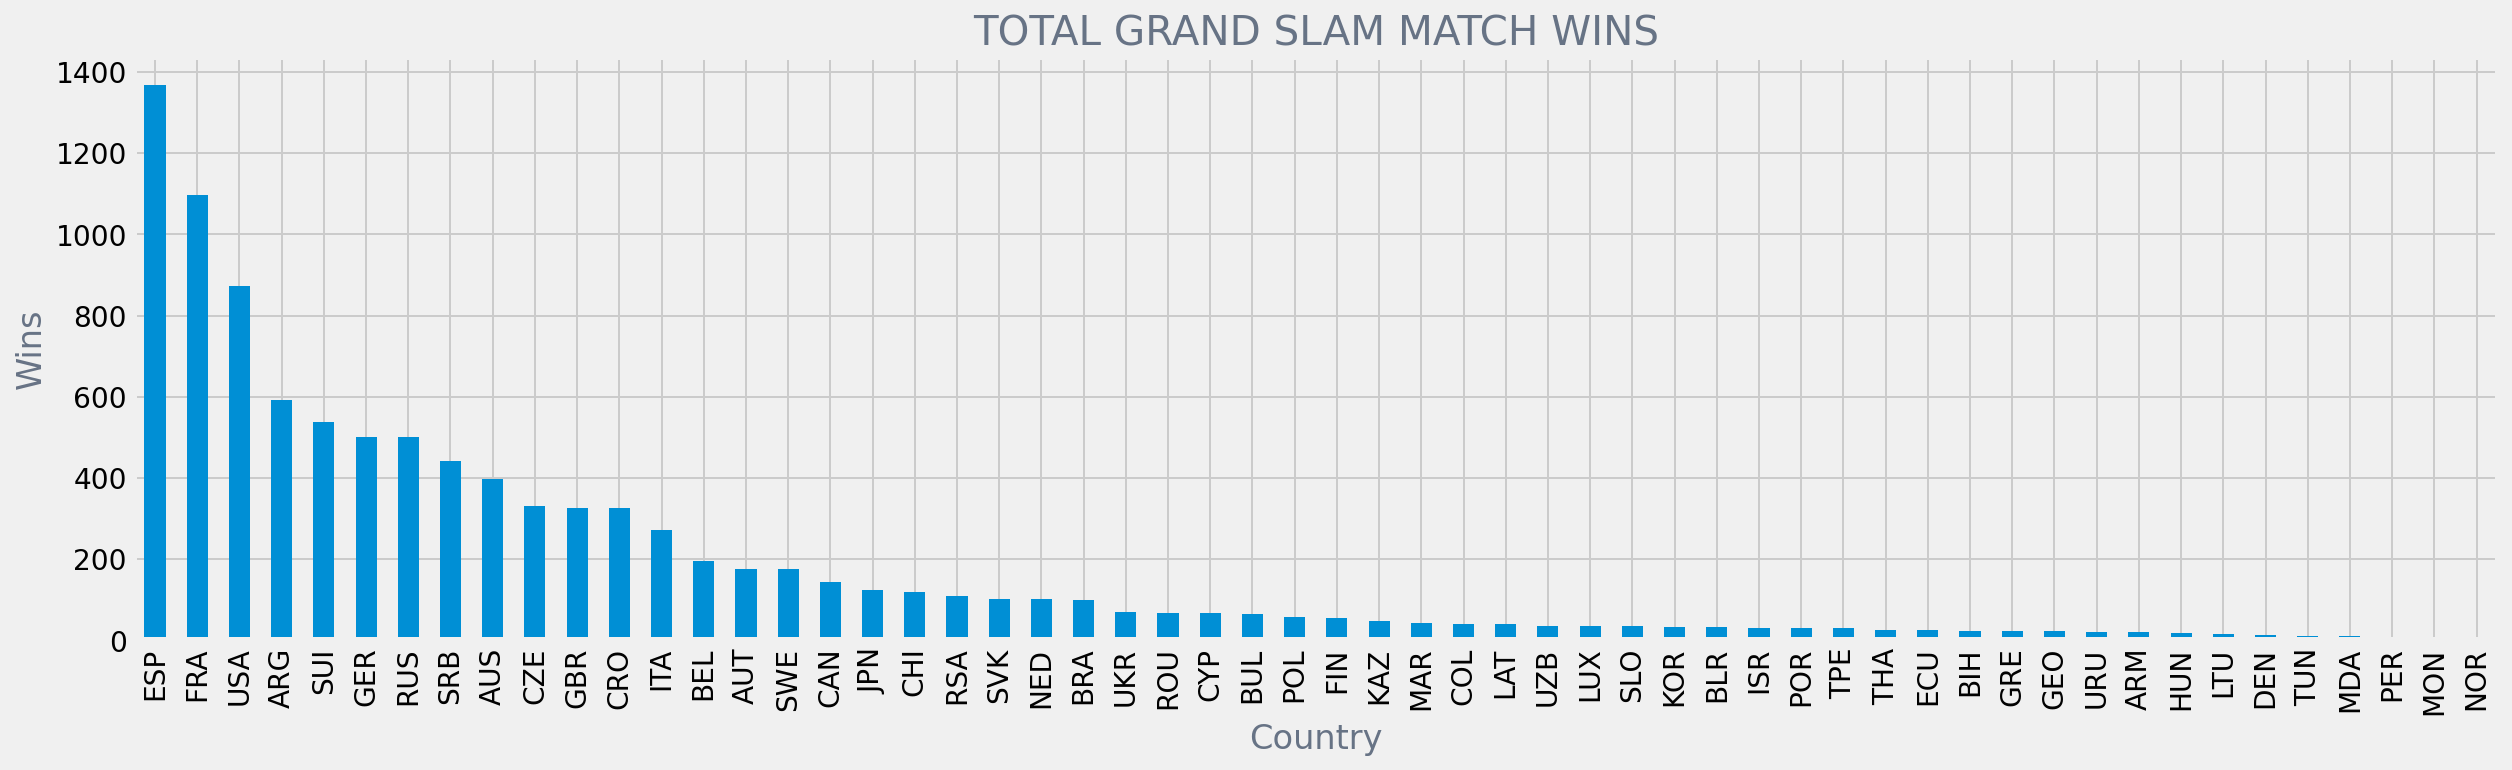

In [351]:
plt.figure(figsize=(200, 5))

plt.subplot(1,9,1)
plt1 = ltennis_country.winner_ioc.value_counts()[:-10].plot(kind='bar')
plt.title('TOTAL GRAND SLAM MATCH WINS')
plt1.set(xlabel = 'Country', ylabel='Wins')

In [352]:
ltennis_countryl= ltennis[['loser_ioc','tourney_level','round']]
ltennis_countryl = ltennis_countryl[(ltennis_countryl.tourney_level == 'G')]
ltennis_countryl.head()

,loser_ioc,tourney_level,round
2658,CZE,G,R128
2659,AUS,G,R128
2657,AUS,G,R128
2656,NED,G,R128
2655,MAR,G,R128


[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Wins')]

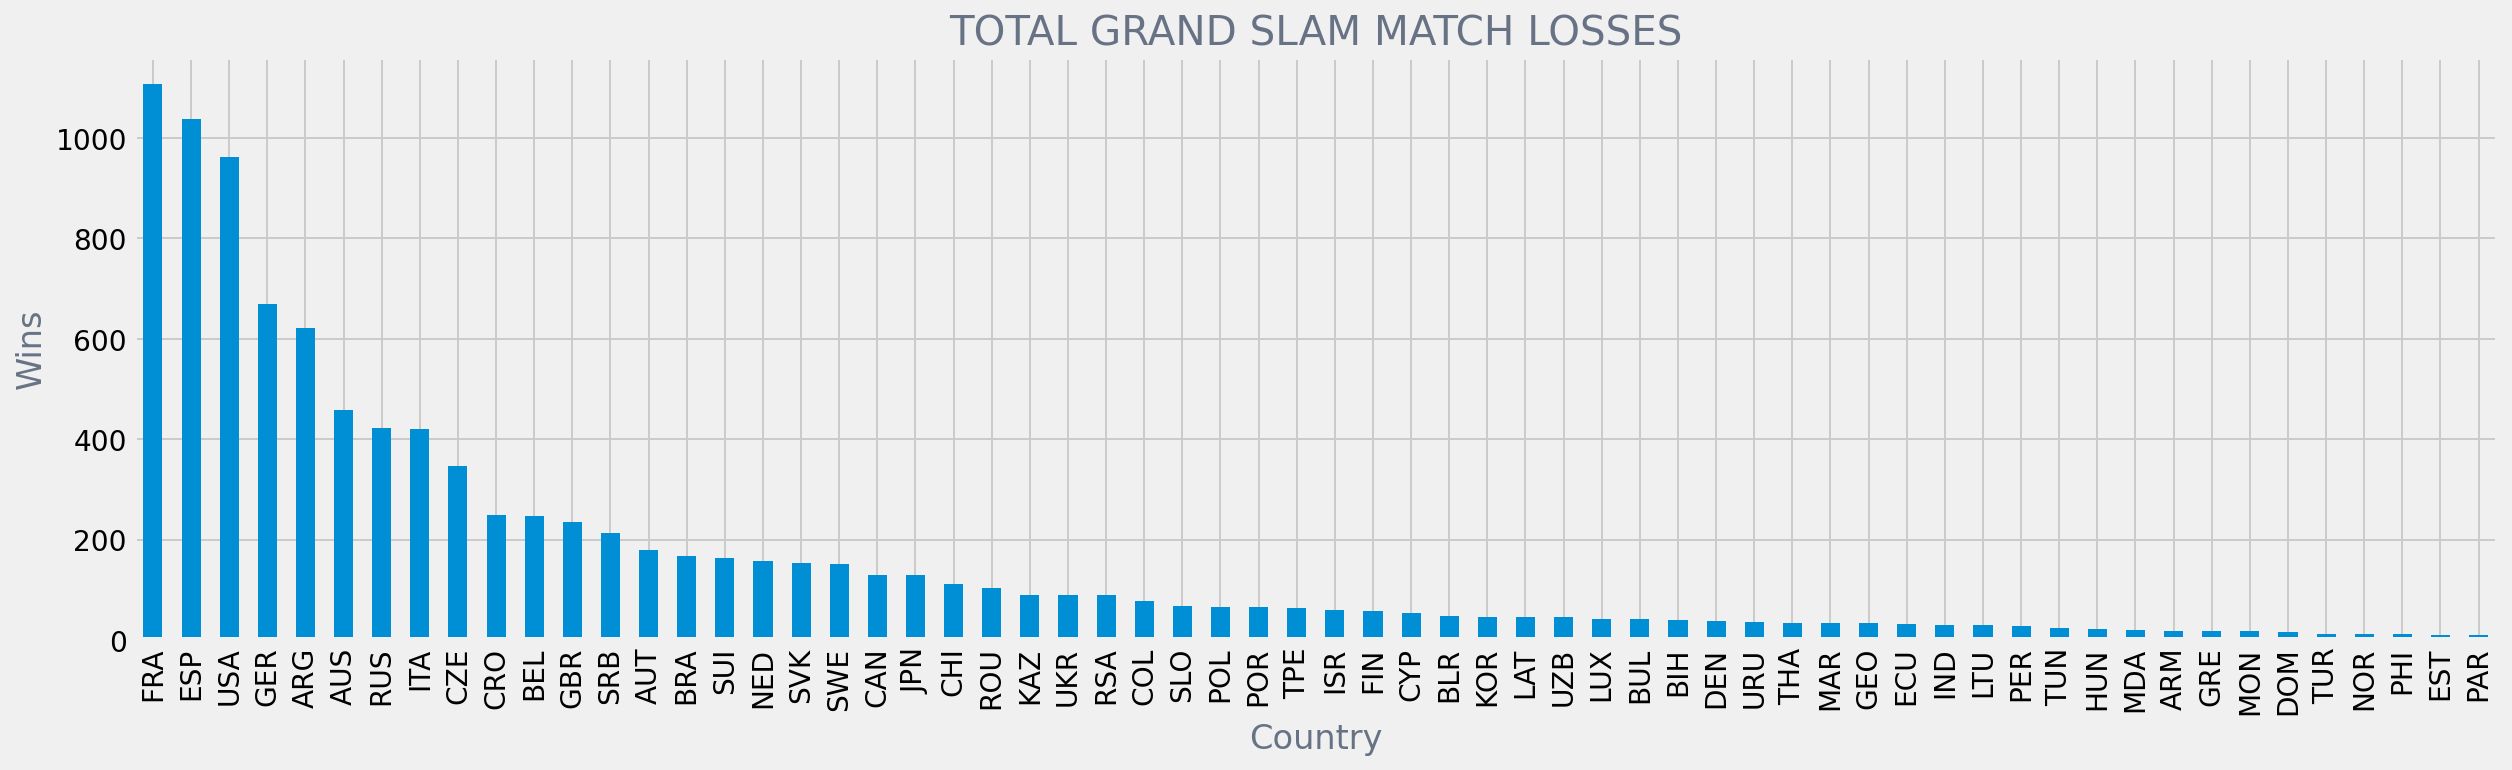

In [353]:
plt.figure(figsize=(200, 5))

plt.subplot(1,9,1)
plt1 = ltennis_countryl.loser_ioc.value_counts()[:-10].plot(kind='bar')
plt.title('TOTAL GRAND SLAM MATCH LOSSES')
plt1.set(xlabel = 'Country', ylabel='Wins')

In [354]:
count4 = ltennis_country.winner_ioc.value_counts()
count4.head()

ESP    1368
FRA    1098
USA     874
ARG     592
SUI     539
Name: winner_ioc, dtype: int64

In [355]:
esp = ltennis[['winner_ioc','tourney_level','winner_name']]
esp = esp[(esp.tourney_level == 'G') & (esp.winner_ioc == 'ESP')]
esp.head()

,winner_ioc,tourney_level,winner_name
2661,ESP,G,Francisco Clavet
2677,ESP,G,Alex Calatrava
2643,ESP,G,Juan Carlos Ferrero
2682,ESP,G,Carlos Moya
2610,ESP,G,Alberto Martin


In [356]:
count5 = esp.winner_name.value_counts()
count5.head()

Rafael Nadal         283
David Ferrer         146
Fernando Verdasco    113
Tommy Robredo        107
Feliciano Lopez       96
Name: winner_name, dtype: int64

In [357]:
fra = ltennis[['winner_ioc','tourney_level','winner_name','round']]
fra = fra[(fra.tourney_level == 'G') & (fra.winner_ioc == 'FRA')]
fra.head()

,winner_ioc,tourney_level,winner_name,round
2644,FRA,G,Cedric Pioline,R128
2679,FRA,G,Sebastien Grosjean,R64
2671,FRA,G,Arnaud Clement,R64
2613,FRA,G,Julien Boutter,R128
2611,FRA,G,Arnaud Clement,R128


In [358]:
count6 = fra.winner_name.value_counts()
fra.head()

,winner_ioc,tourney_level,winner_name,round
2644,FRA,G,Cedric Pioline,R128
2679,FRA,G,Sebastien Grosjean,R64
2671,FRA,G,Arnaud Clement,R64
2613,FRA,G,Julien Boutter,R128
2611,FRA,G,Arnaud Clement,R128


In [359]:
usa = ltennis[['winner_ioc','tourney_level','winner_name']]
usa = usa[(usa.tourney_level == 'G') & (usa.winner_ioc == 'USA')]
usa.head()

,winner_ioc,tourney_level,winner_name
2651,USA,G,Pete Sampras
2647,USA,G,Todd Martin
2674,USA,G,Chris Woodruff
2616,USA,G,Chris Woodruff
2637,USA,G,Paul Goldstein


In [360]:
count7 = usa.winner_name.value_counts()
arg = ltennis[['winner_ioc','tourney_level','winner_name']]
arg = arg[(arg.tourney_level == 'G') & (arg.winner_ioc == 'ARG')]
arg.head()

,winner_ioc,tourney_level,winner_name
2648,ARG,G,Juan Ignacio Chela
2646,ARG,G,Agustin Calleri
2664,ARG,G,Guillermo Canas
2641,ARG,G,Mariano Zabaleta
2622,ARG,G,Guillermo Coria


In [361]:
count8 = arg.winner_name.value_counts()
sui = ltennis[['winner_ioc','tourney_level','winner_name']]
sui = sui[(sui.tourney_level == 'G') & (sui.winner_ioc == 'SUI')]
sui.head()

,winner_ioc,tourney_level,winner_name
2656,SUI,G,Michel Kratochvil
2655,SUI,G,Ivo Heuberger
2670,SUI,G,Roger Federer
2609,SUI,G,Roger Federer
2633,SUI,G,Marc Rosset


In [362]:
count9 = sui.winner_name.value_counts()
ltennis_country.head(5)

,winner_ioc,tourney_level,round
2658,RUS,G,R128
2659,AUS,G,R128
2657,BLR,G,R128
2656,SUI,G,R128
2655,SUI,G,R128


In [363]:
ltennis_country.count()

winner_ioc       10033
tourney_level    10033
round            10033
dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Wins')]

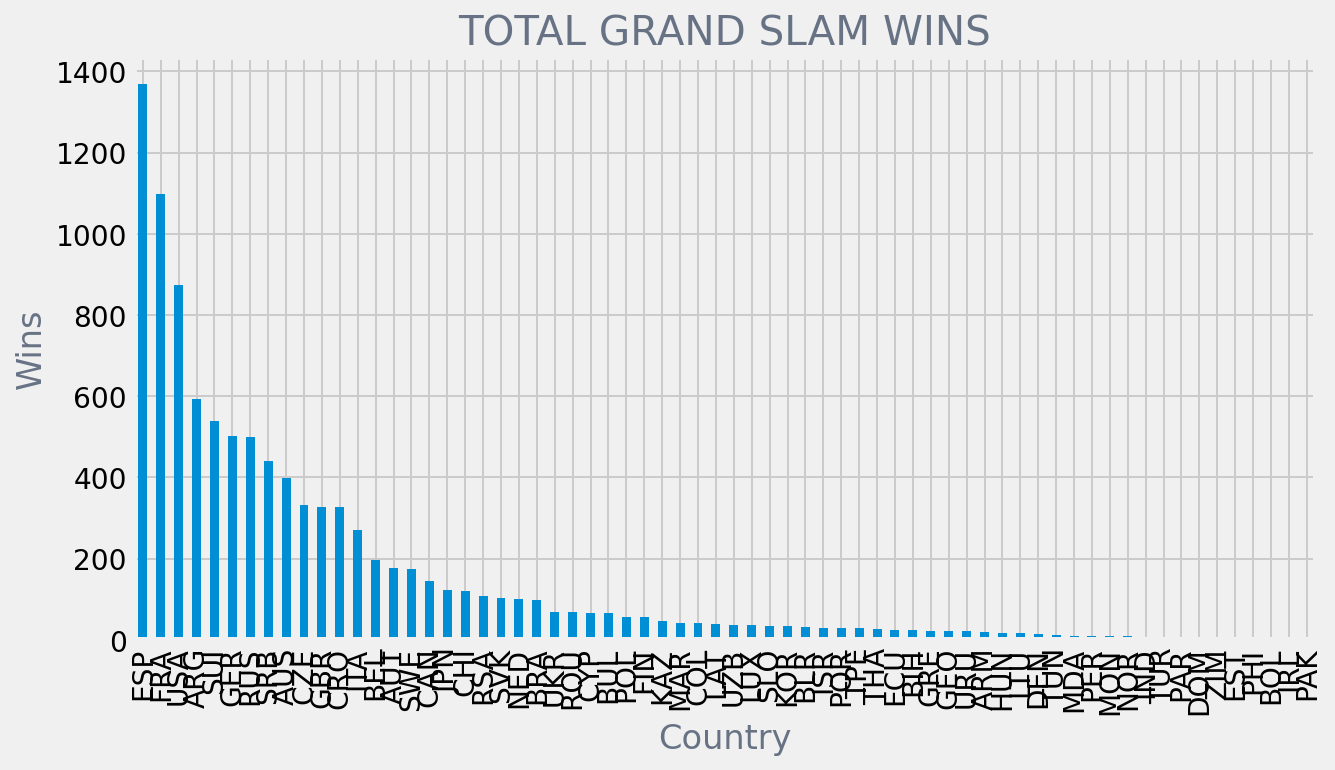

In [364]:
plt.figure(figsize=(100, 5))

plt.subplot(1,9,1)
plt1 = ltennis_country.winner_ioc.value_counts().plot(kind='bar')
plt.title('TOTAL GRAND SLAM WINS')
plt1.set(xlabel = 'Country', ylabel='Wins')

# Predictive Modeling

In [365]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os
import timeit

from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

In [366]:
#Show all columns
pd.options.display.max_columns = None
# Update matplotlib defaults to create presentable figures 
colors = ['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', 
          '#D34100', '#FF9700', '#091D32']
mpl_update = {'font.size':16,
              'xtick.labelsize':14,'ytick.labelsize':14,
              'figure.figsize':[12.0, 8.0],
              'axes.labelsize':20, 'axes.labelcolor':'#677385',
              'axes.titlesize':20, 'lines.color':'#0055A7',
              'lines.linewidth':3, 'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

In [367]:
atp=tennis_df
atp.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_yearmonth,tourney_year
0,2001-301,Auckland,Hard,32,A,20010108,1,102905,NaN,NaN,Stefan Koubek,L,175.0,AUT,24.016427,102644,1.0,NaN,Franco Squillari,L,183.0,ARG,25.382615,7-6(4) 6-2,3,R32,84.0,5.0,2.0,93.0,58.0,38.0,17.0,10.0,14.0,16.0,5.0,5.0,66.0,31.0,19.0,15.0,10.0,4.0,8.0,52.0,755.0,14.0,1598.0,200101,2001
1,2001-301,Auckland,Hard,32,A,20010108,2,102231,NaN,NaN,Alex Calatrava,R,190.0,ESP,27.570157,102860,NaN,NaN,Agustin Calleri,R,183.0,ARG,24.317591,6-3 1-6 6-3,3,R32,78.0,6.0,2.0,74.0,47.0,36.0,14.0,13.0,0.0,2.0,14.0,3.0,63.0,37.0,33.0,11.0,12.0,1.0,3.0,53.0,751.0,64.0,633.0,200101,2001
2,2001-301,Auckland,Hard,32,A,20010108,3,102257,NaN,WC,Greg Rusedski,L,193.0,GBR,27.340178,103066,NaN,WC,Mark Nielsen,R,185.0,NZL,23.252567,6-4 6-4,3,R32,87.0,15.0,5.0,64.0,36.0,29.0,17.0,10.0,4.0,4.0,1.0,5.0,72.0,45.0,31.0,12.0,10.0,4.0,6.0,73.0,575.0,260.0,129.0,200101,2001
3,2001-301,Auckland,Hard,32,A,20010108,4,101647,5.0,NaN,Byron Black,R,175.0,ZIM,31.258042,102287,NaN,NaN,Albert Portas,R,188.0,ESP,27.148528,2-6 6-2 6-4,3,R32,81.0,1.0,1.0,72.0,52.0,34.0,11.0,13.0,2.0,5.0,15.0,0.0,69.0,35.0,31.0,11.0,13.0,3.0,7.0,35.0,965.0,49.0,760.0,200101,2001
4,2001-301,Auckland,Hard,32,A,20010108,5,102998,3.0,NaN,Jan Michael Gambill,R,190.0,USA,23.600274,103454,NaN,NaN,Nicolas Massu,R,183.0,CHI,21.248460,7-6(4) 6-4,3,R32,103.0,15.0,5.0,67.0,33.0,27.0,14.0,11.0,1.0,4.0,8.0,6.0,81.0,40.0,27.0,15.0,11.0,5.0,9.0,33.0,1030.0,67.0,601.0,200101,2001


In [368]:
cat_col=['tourney_id',
 'tourney_name',
 'surface',
 'tourney_level',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ioc',
 'loser_name',
 'loser_hand',
 'loser_ioc',
 'score',
 'round']
num_col=['draw_size',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_ht',
 'winner_age',
 'winner_rank',
 'winner_rank_points',
 'loser_id',
 'loser_seed',
 'loser_entry', 
 'loser_ht',
 'loser_age',
 'loser_rank',
 'loser_rank_points',
 'best_of',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced']
date_col=['tourney_date']

In [369]:
atp[num_col] = atp[num_col].apply(pd.to_numeric, errors='coerce', axis=1)
atp['tourney_date']=pd.to_datetime(atp.tourney_date, format='%Y%m%d')
atp.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                    float64
winner_id                    float64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
loser_id                     float64
loser_seed                   float64
loser_entry                  float64
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
score                         object
best_of                      float64
round                         object
minutes                      float64
w

In [370]:
winner_cols = [col for col in atp.columns if ('winner' in col) or (col[:2]=="w_")]
loser_cols = [col for col in atp.columns if ('loser' in col) or (col[:2]=="l_")]
print(winner_cols)
print(loser_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'winner_rank', 'winner_rank_points']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'loser_rank', 'loser_rank_points']


In [371]:
common_cols = [col for col in atp.columns if (col not in winner_cols) and (col not in loser_cols)]
print(common_cols)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes', 'tourney_yearmonth', 'tourney_year']


In [372]:
w_cols=winner_cols + common_cols
l_cols=loser_cols + common_cols
print(w_cols)
print(l_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'winner_rank', 'winner_rank_points', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes', 'tourney_yearmonth', 'tourney_year']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'loser_rank', 'loser_rank_points', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes', 'tourney_yearmonth', 'tourney_year']


In [373]:
w_df=atp[w_cols]
w_df=w_df.rename(columns=lambda x: x.replace('winner', 'player'))
w_df=w_df.rename(columns=lambda x: x.replace('w_', ''))
w_df=w_df.rename(columns={'drasize':'draw_size'})
w_df=w_df.assign(result=1) #add results
w_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,tourney_yearmonth,tourney_year,result
0,102905.0,NaN,NaN,Stefan Koubek,L,175.0,AUT,24.016427,5.0,2.0,93.0,58.0,38.0,17.0,10.0,14.0,16.0,52.0,755.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,1.0,7-6(4) 6-2,3.0,R32,84.0,200101,2001,1
1,102231.0,NaN,NaN,Alex Calatrava,R,190.0,ESP,27.570157,6.0,2.0,74.0,47.0,36.0,14.0,13.0,0.0,2.0,53.0,751.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,2.0,6-3 1-6 6-3,3.0,R32,78.0,200101,2001,1
2,102257.0,NaN,WC,Greg Rusedski,L,193.0,GBR,27.340178,15.0,5.0,64.0,36.0,29.0,17.0,10.0,4.0,4.0,73.0,575.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,3.0,6-4 6-4,3.0,R32,87.0,200101,2001,1
3,101647.0,5.0,NaN,Byron Black,R,175.0,ZIM,31.258042,1.0,1.0,72.0,52.0,34.0,11.0,13.0,2.0,5.0,35.0,965.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,4.0,2-6 6-2 6-4,3.0,R32,81.0,200101,2001,1
4,102998.0,3.0,NaN,Jan Michael Gambill,R,190.0,USA,23.600274,15.0,5.0,67.0,33.0,27.0,14.0,11.0,1.0,4.0,33.0,1030.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,5.0,7-6(4) 6-4,3.0,R32,103.0,200101,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,105554.0,NaN,NaN,Daniel Evans,R,175.0,GBR,30.409309,9.0,2.0,70.0,47.0,36.0,14.0,13.0,1.0,3.0,35.0,1384.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,125.0,6-2 3-6 6-3,3.0,R32,115.0,202010,2020,1
1458,200267.0,NaN,WC,Zizou Bergs,R,NaN,BEL,21.379877,7.0,2.0,77.0,54.0,33.0,13.0,12.0,6.0,9.0,528.0,58.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,126.0,7-5 7-5,3.0,R32,102.0,202010,2020,1
1459,126203.0,7.0,NaN,Taylor Fritz,R,193.0,USA,22.976044,10.0,1.0,59.0,44.0,39.0,6.0,10.0,0.0,0.0,28.0,1670.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,128.0,7-6(5) 6-1,3.0,R32,67.0,202010,2020,1
1460,144750.0,NaN,Q,Lloyd Harris,R,193.0,RSA,23.649555,7.0,2.0,49.0,33.0,28.0,11.0,10.0,1.0,2.0,90.0,748.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,129.0,7-5 6-2,3.0,R32,84.0,202010,2020,1


In [374]:
l_df=atp[l_cols]
l_df=l_df.rename(columns=lambda x: x.replace('loser', 'player'))
l_df=l_df.rename(columns=lambda x: x.replace('l_', ''))
l_df=l_df.assign(result=0) #add results
l_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,tourney_yearmonth,tourney_year,result
0,102644.0,1.0,NaN,Franco Squillari,L,183.0,ARG,25.382615,5.0,5.0,66.0,31.0,19.0,15.0,10.0,4.0,8.0,14.0,1598.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,1.0,7-6(4) 6-2,3.0,R32,84.0,200101,2001,0
1,102860.0,NaN,NaN,Agustin Calleri,R,183.0,ARG,24.317591,14.0,3.0,63.0,37.0,33.0,11.0,12.0,1.0,3.0,64.0,633.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,2.0,6-3 1-6 6-3,3.0,R32,78.0,200101,2001,0
2,103066.0,NaN,NaN,Mark Nielsen,R,185.0,NZL,23.252567,1.0,5.0,72.0,45.0,31.0,12.0,10.0,4.0,6.0,260.0,129.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,3.0,6-4 6-4,3.0,R32,87.0,200101,2001,0
3,102287.0,NaN,NaN,Albert Portas,R,188.0,ESP,27.148528,15.0,0.0,69.0,35.0,31.0,11.0,13.0,3.0,7.0,49.0,760.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,4.0,2-6 6-2 6-4,3.0,R32,81.0,200101,2001,0
4,103454.0,NaN,NaN,Nicolas Massu,R,183.0,CHI,21.248460,8.0,6.0,81.0,40.0,27.0,15.0,11.0,5.0,9.0,67.0,601.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,5.0,7-6(4) 6-4,3.0,R32,103.0,200101,2001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,106099.0,NaN,NaN,Salvatore Caruso,R,185.0,ITA,27.843943,4.0,1.0,77.0,43.0,31.0,14.0,13.0,3.0,7.0,79.0,802.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,125.0,6-2 3-6 6-3,3.0,R32,115.0,202010,2020,0
1458,105077.0,NaN,NaN,Albert Ramos,L,188.0,ESP,32.755647,1.0,3.0,66.0,45.0,27.0,10.0,12.0,4.0,9.0,45.0,1165.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,126.0,7-5 7-5,3.0,R32,102.0,202010,2020,0
1459,124187.0,NaN,NaN,Reilly Opelka,R,211.0,USA,23.143053,19.0,3.0,58.0,37.0,30.0,5.0,9.0,3.0,5.0,33.0,1402.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,128.0,7-6(5) 6-1,3.0,R32,67.0,202010,2020,0
1460,144895.0,NaN,NaN,Corentin Moutet,L,178.0,FRA,21.503080,0.0,2.0,62.0,45.0,29.0,5.0,10.0,7.0,11.0,74.0,838.0,2020-7485,Antwerp,Hard,32.0,A,2020-10-19,129.0,7-5 6-2,3.0,R32,84.0,202010,2020,0


In [375]:
#create relative features
w_df['player_ht_diff']=w_df['player_ht']-l_df['player_ht']
w_df['player_age_diff']=w_df['player_age']-l_df['player_age']
w_df['player_rank_diff']=w_df['player_rank']-l_df['player_rank']
w_df['player_rank_points_diff']=w_df['player_rank_points']-l_df['player_rank_points']

l_df['player_ht_diff']=l_df['player_ht']-w_df['player_ht']
l_df['player_age_diff']=l_df['player_age']-w_df['player_age']
l_df['player_rank_diff']=l_df['player_rank']-w_df['player_rank']
l_df['player_rank_points_diff']=l_df['player_rank_points']-w_df['player_rank_points']

In [376]:
atp=w_df.append(l_df)
atp.head()

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,tourney_yearmonth,tourney_year,result,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff
0,102905.0,NaN,NaN,Stefan Koubek,L,175.0,AUT,24.016427,5.0,2.0,93.0,58.0,38.0,17.0,10.0,14.0,16.0,52.0,755.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,1.0,7-6(4) 6-2,3.0,R32,84.0,200101,2001,1,-8.0,-1.366188,38.0,-843.0
1,102231.0,NaN,NaN,Alex Calatrava,R,190.0,ESP,27.570157,6.0,2.0,74.0,47.0,36.0,14.0,13.0,0.0,2.0,53.0,751.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,2.0,6-3 1-6 6-3,3.0,R32,78.0,200101,2001,1,7.0,3.252567,-11.0,118.0
2,102257.0,NaN,WC,Greg Rusedski,L,193.0,GBR,27.340178,15.0,5.0,64.0,36.0,29.0,17.0,10.0,4.0,4.0,73.0,575.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,3.0,6-4 6-4,3.0,R32,87.0,200101,2001,1,8.0,4.087611,-187.0,446.0
3,101647.0,5.0,NaN,Byron Black,R,175.0,ZIM,31.258042,1.0,1.0,72.0,52.0,34.0,11.0,13.0,2.0,5.0,35.0,965.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,4.0,2-6 6-2 6-4,3.0,R32,81.0,200101,2001,1,-13.0,4.109514,-14.0,205.0
4,102998.0,3.0,NaN,Jan Michael Gambill,R,190.0,USA,23.600274,15.0,5.0,67.0,33.0,27.0,14.0,11.0,1.0,4.0,33.0,1030.0,2001-301,Auckland,Hard,32.0,A,2001-01-08,5.0,7-6(4) 6-4,3.0,R32,103.0,200101,2001,1,7.0,2.351814,-34.0,429.0


In [377]:
atp.describe()

,player_id,player_seed,player_ht,player_age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,draw_size,match_num,best_of,minutes,result,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff
count,119578.000000,38601.000000,112915.000000,119576.000000,108466.000000,108466.000000,108466.000000,108466.000000,108466.000000,108466.000000,108466.000000,108466.000000,108466.000000,117848.000000,117848.000000,119578.000000,119578.000000,119578.000000,105822.000000,119578.000000,1.088840e+05,1.195740e+05,116598.000000,116598.000000
mean,105587.581487,7.926479,185.789860,26.366892,6.016973,2.995897,79.355761,48.106531,34.239872,15.812559,12.391625,4.106061,6.813527,99.768422,1264.437267,54.200003,78.938149,3.468247,105.886980,0.500000,-3.341151e-17,6.655359e-18,0.000000,0.000000
std,9329.019120,7.058346,7.243236,3.949847,5.314420,2.418294,29.290809,19.094555,14.134291,7.161780,4.236463,3.232904,4.457601,168.444102,1665.923757,39.609686,126.449473,0.846903,41.019186,0.500002,9.668272e+00,5.307079e+00,169.828523,2139.419639
min,100644.000000,1.000000,1.700000,14.513347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,3.000000,0.000000,0.000000,-1.833000e+02,-2.592197e+01,-2125.000000,-16641.000000
25%,103490.000000,3.000000,183.000000,23.452430,2.000000,1.000000,58.000000,34.000000,24.000000,11.000000,9.000000,2.000000,3.000000,26.000000,480.000000,32.000000,10.000000,3.000000,76.000000,0.000000,-5.000000e+00,-3.581109e+00,-43.000000,-533.000000
50%,104259.000000,6.000000,185.000000,26.250513,5.000000,3.000000,74.000000,45.000000,32.000000,15.000000,11.000000,4.000000,6.000000,56.000000,786.000000,32.000000,25.000000,3.000000,98.000000,0.500000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,105023.000000,10.000000,190.000000,29.114305,8.000000,4.000000,95.000000,58.000000,42.000000,20.000000,15.000000,6.000000,9.000000,100.000000,1335.000000,64.000000,87.000000,3.000000,128.000000,1.000000,5.000000e+00,3.581109e+00,43.000000,533.000000
max,210013.000000,35.000000,211.000000,46.036961,113.000000,26.000000,491.000000,361.000000,292.000000,101.000000,91.000000,27.000000,35.000000,2159.000000,16950.000000,128.000000,1701.000000,5.000000,1146.000000,1.000000,1.833000e+02,2.592197e+01,2125.000000,16641.000000


<AxesSubplot:xlabel='player_rank_points', ylabel='Density'>

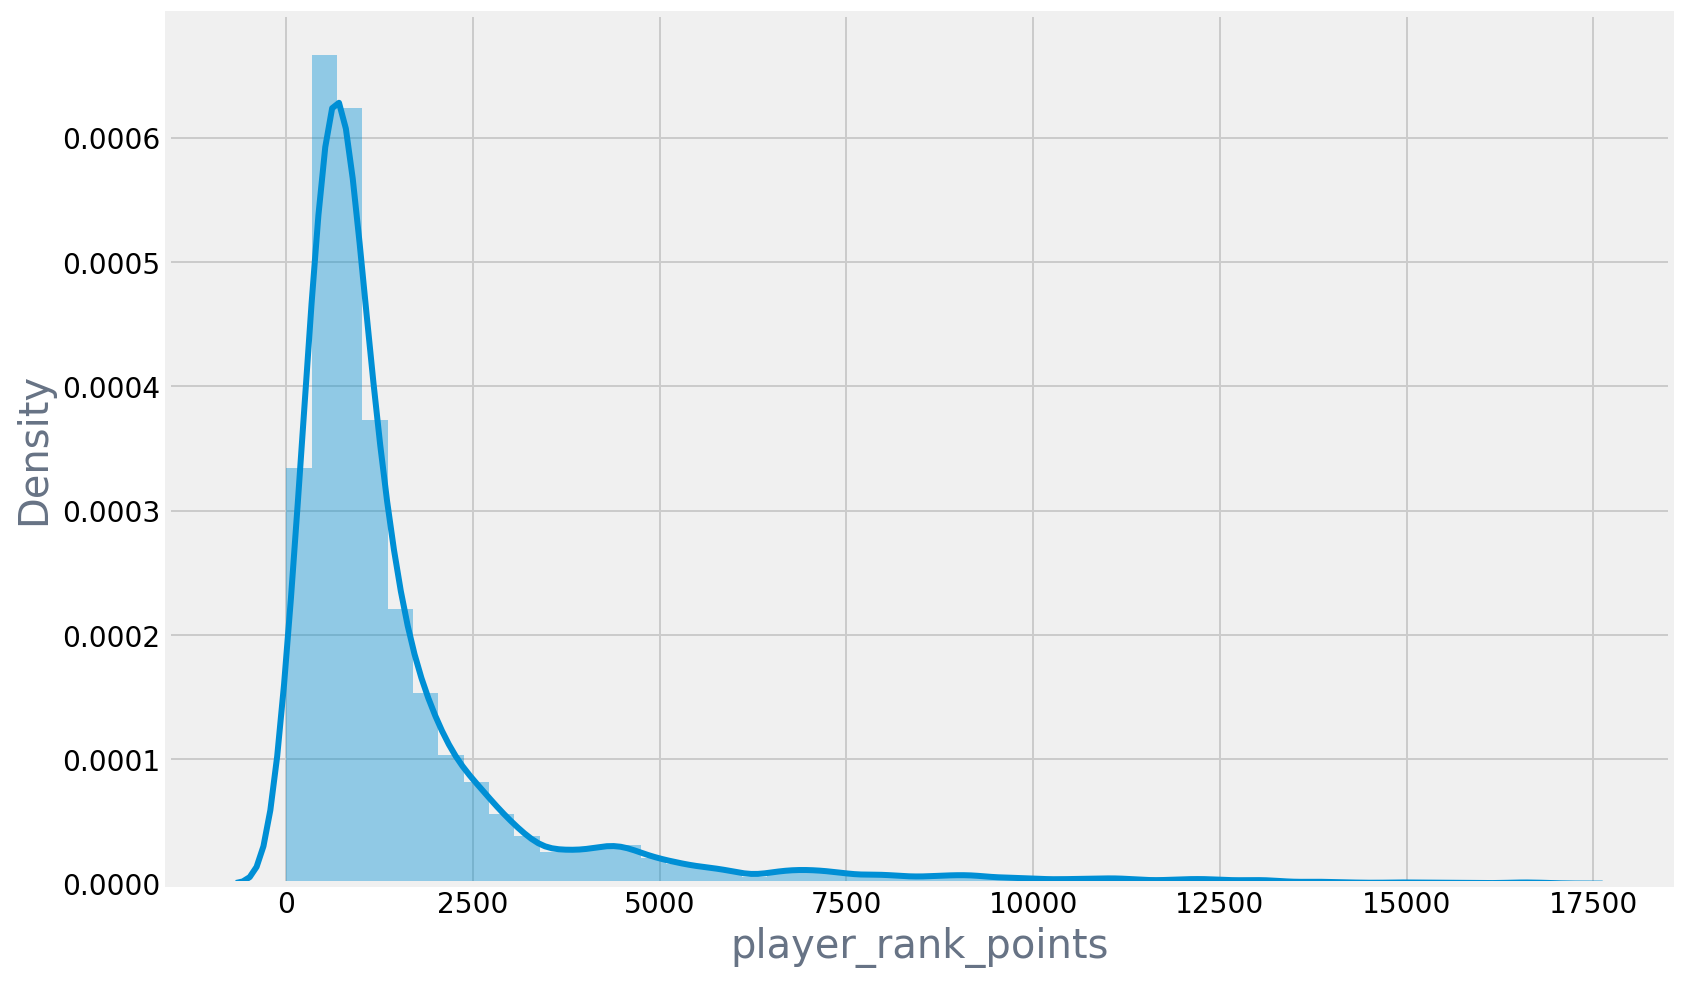

In [413]:
sns.distplot(atp[atp['result'] == 1].player_rank_points.dropna())



<AxesSubplot:xlabel='player_rank_points', ylabel='Density'>

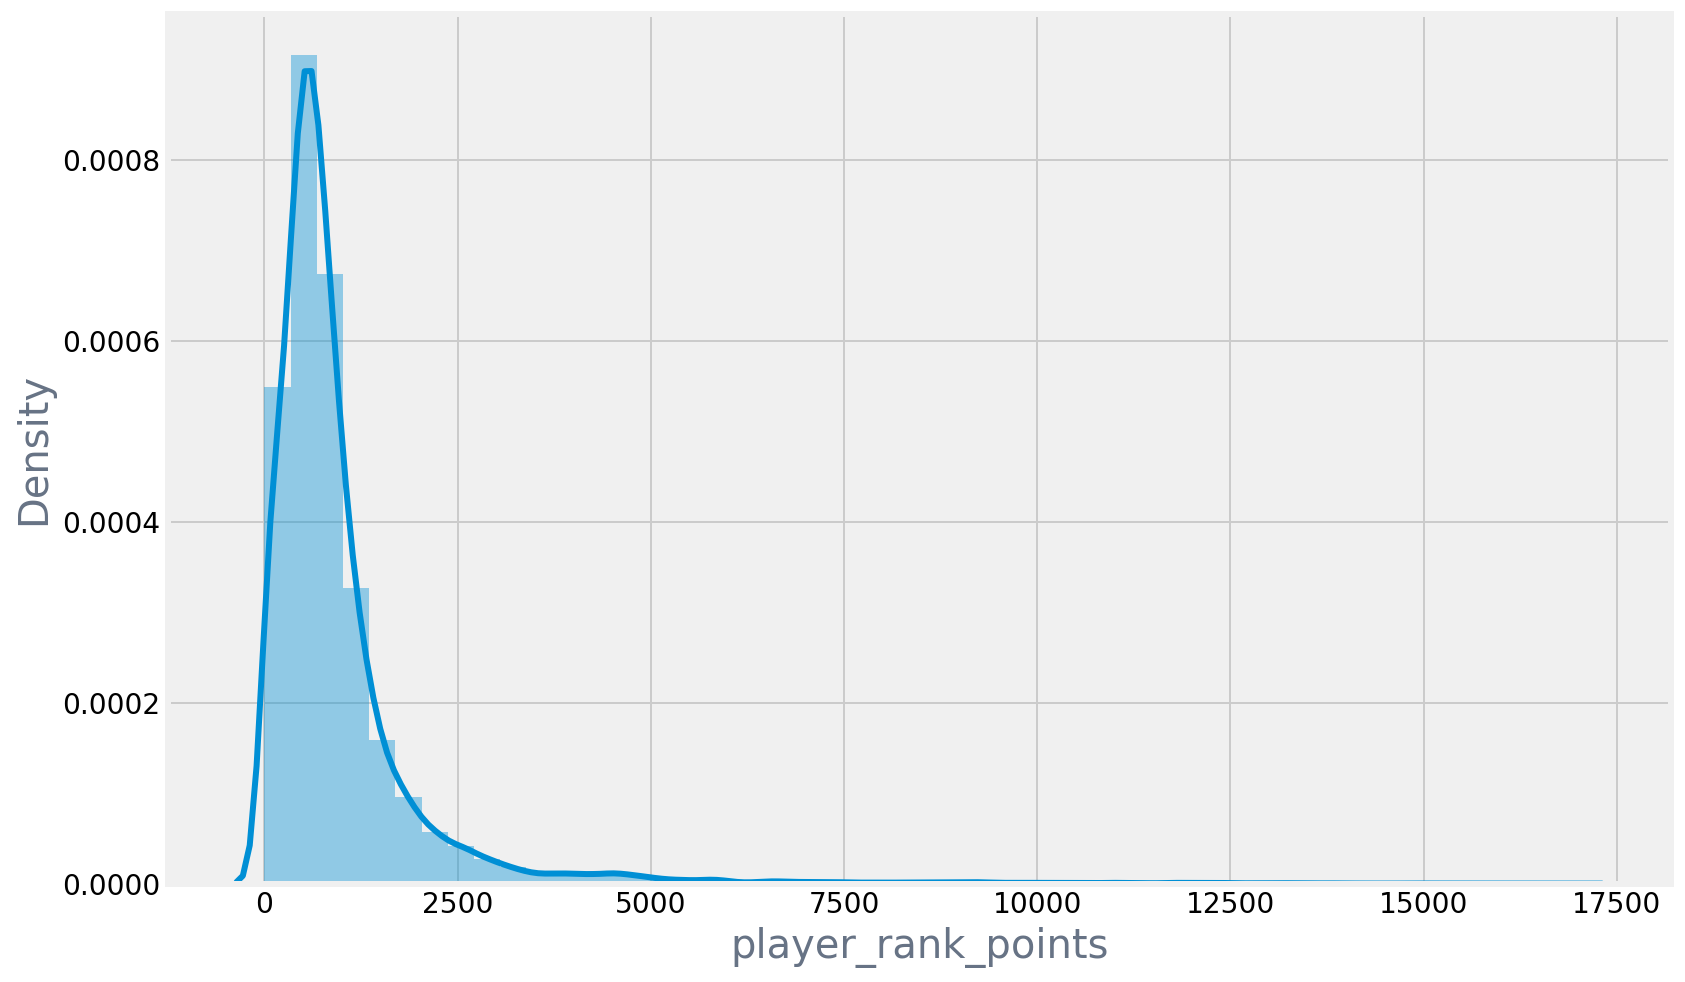

In [414]:
sns.distplot(atp[atp['result'] == 0].player_rank_points.dropna())

<AxesSubplot:xlabel='player_age', ylabel='Density'>

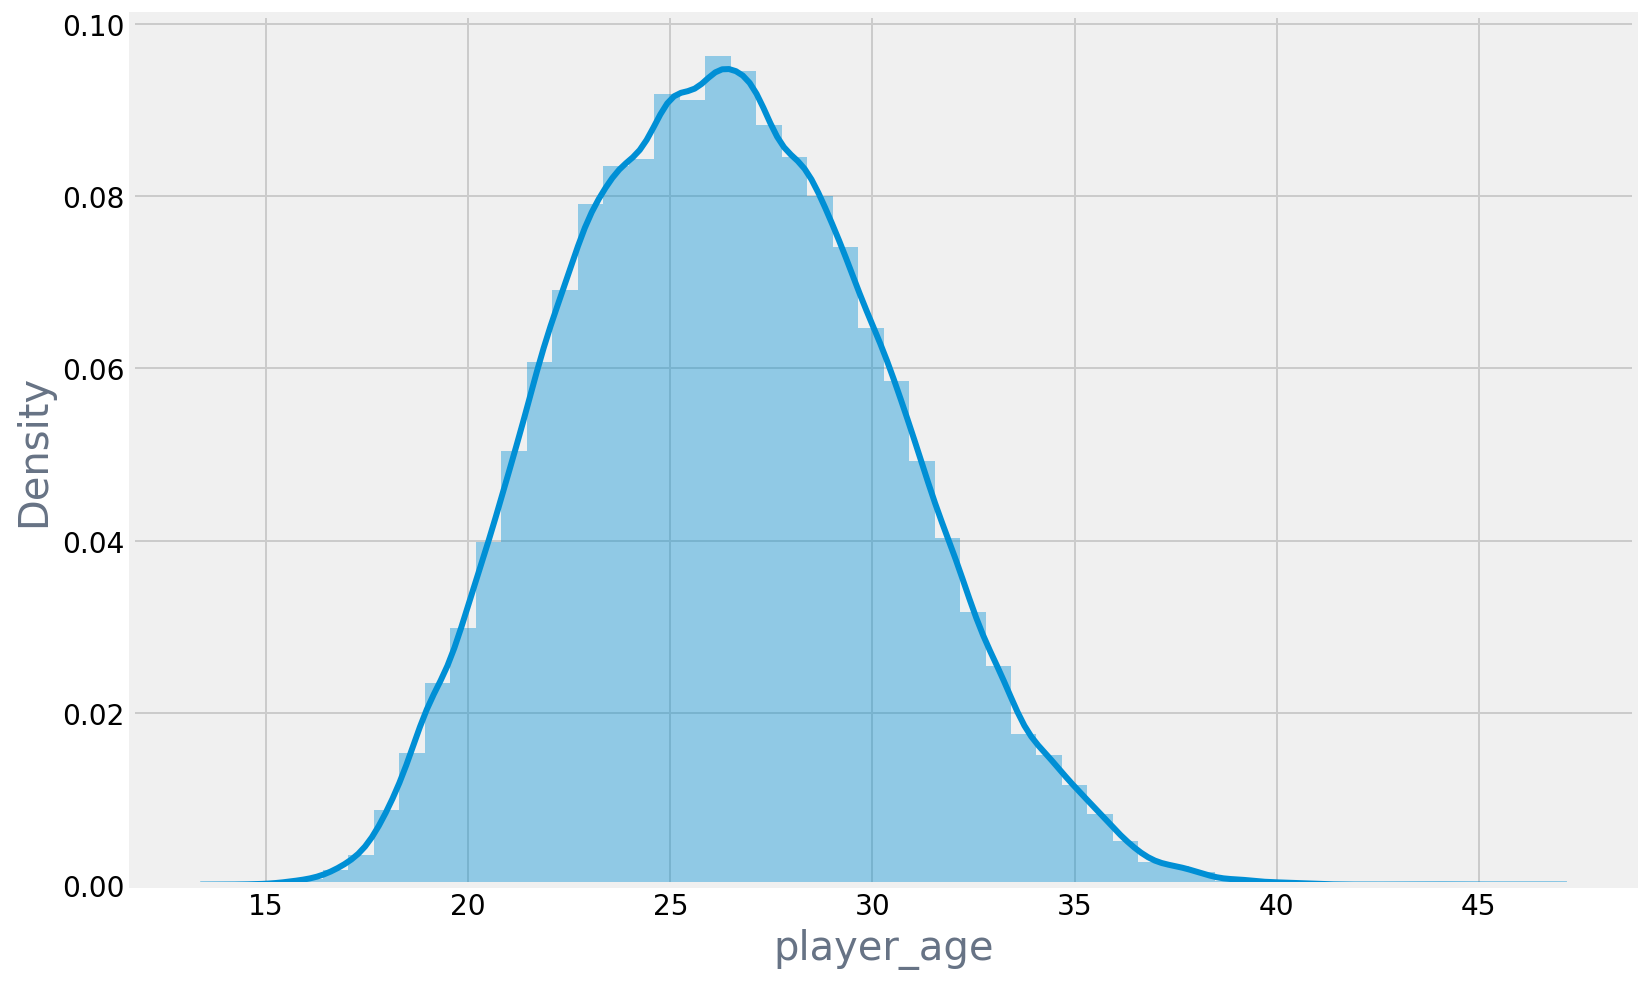

In [379]:
sns.distplot(atp.player_age.dropna())

<AxesSubplot:xlabel='surface', ylabel='count'>

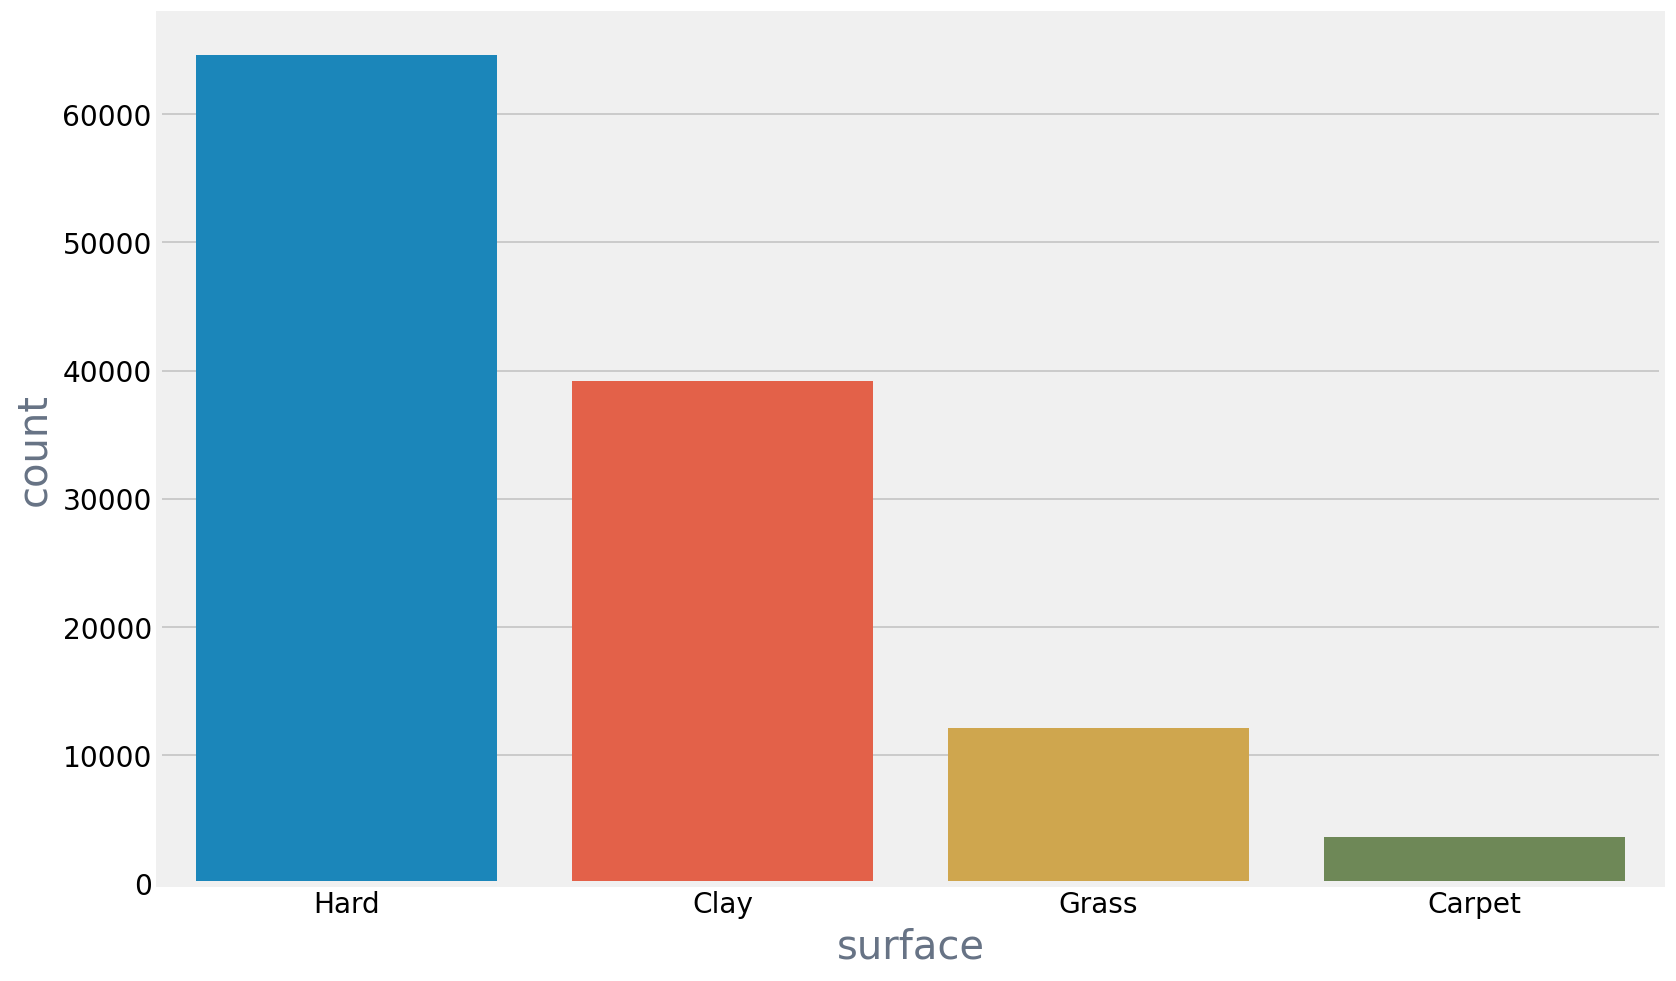

In [380]:
sns.countplot(x="surface",data=atp)

<AxesSubplot:xlabel='surface', ylabel='ace'>

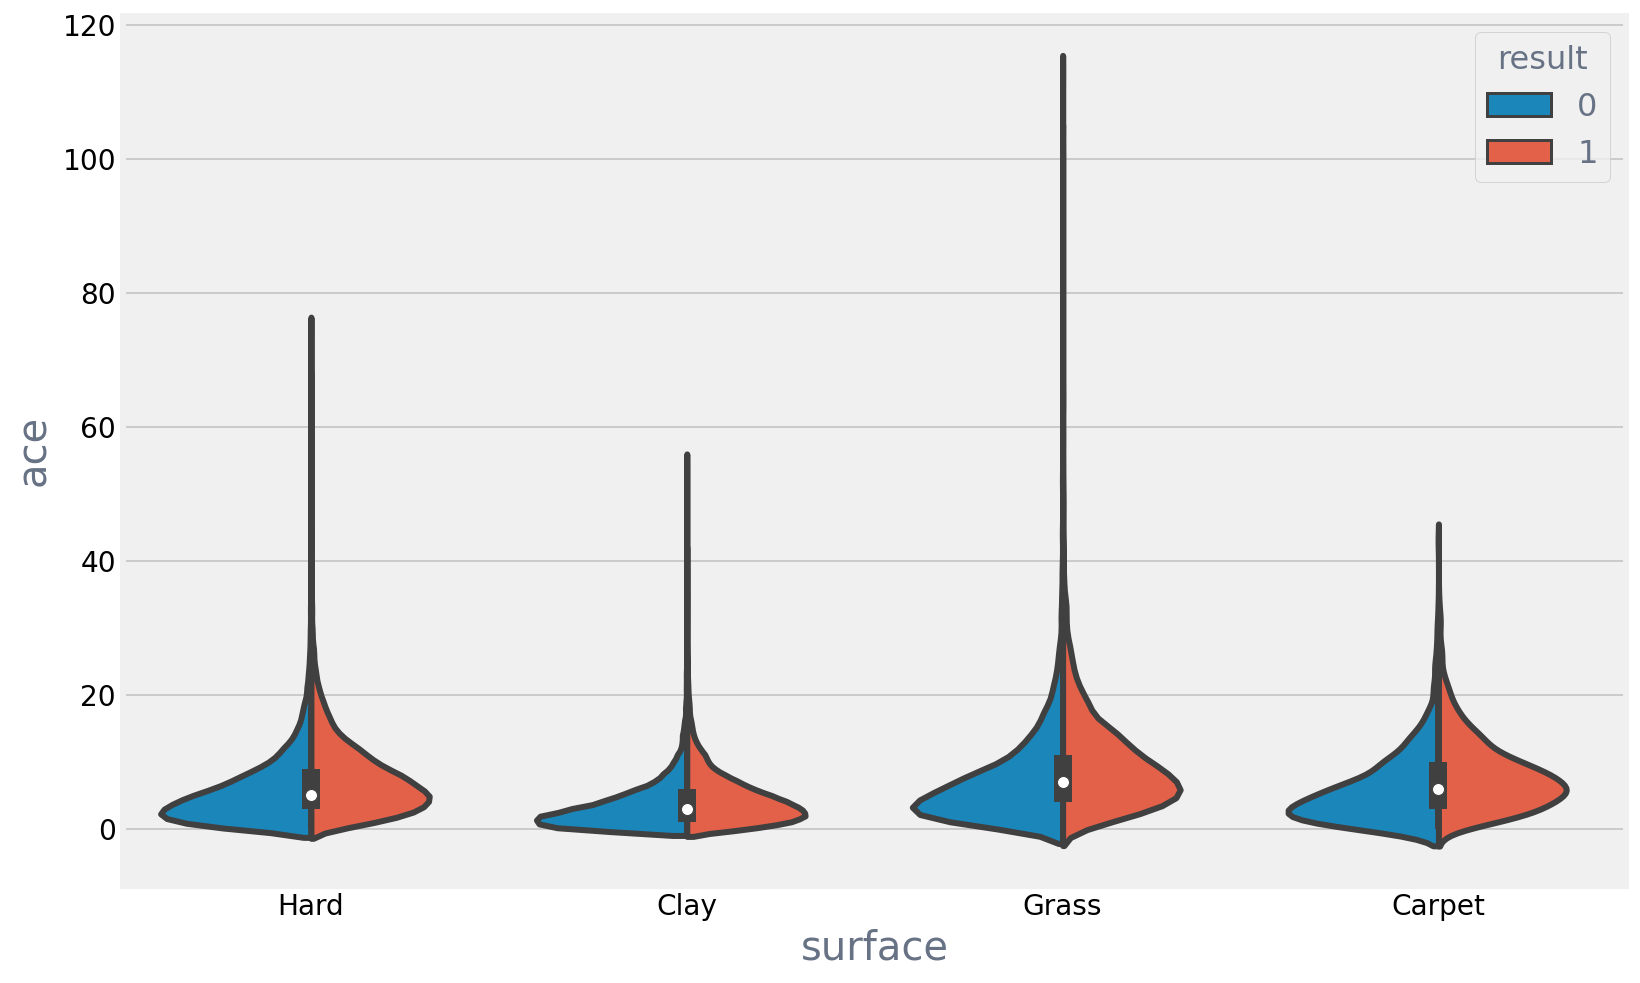

In [381]:
sns.violinplot(x="surface", y="ace", hue="result",split=True, data=atp)

<AxesSubplot:xlabel='player_hand', ylabel='count'>

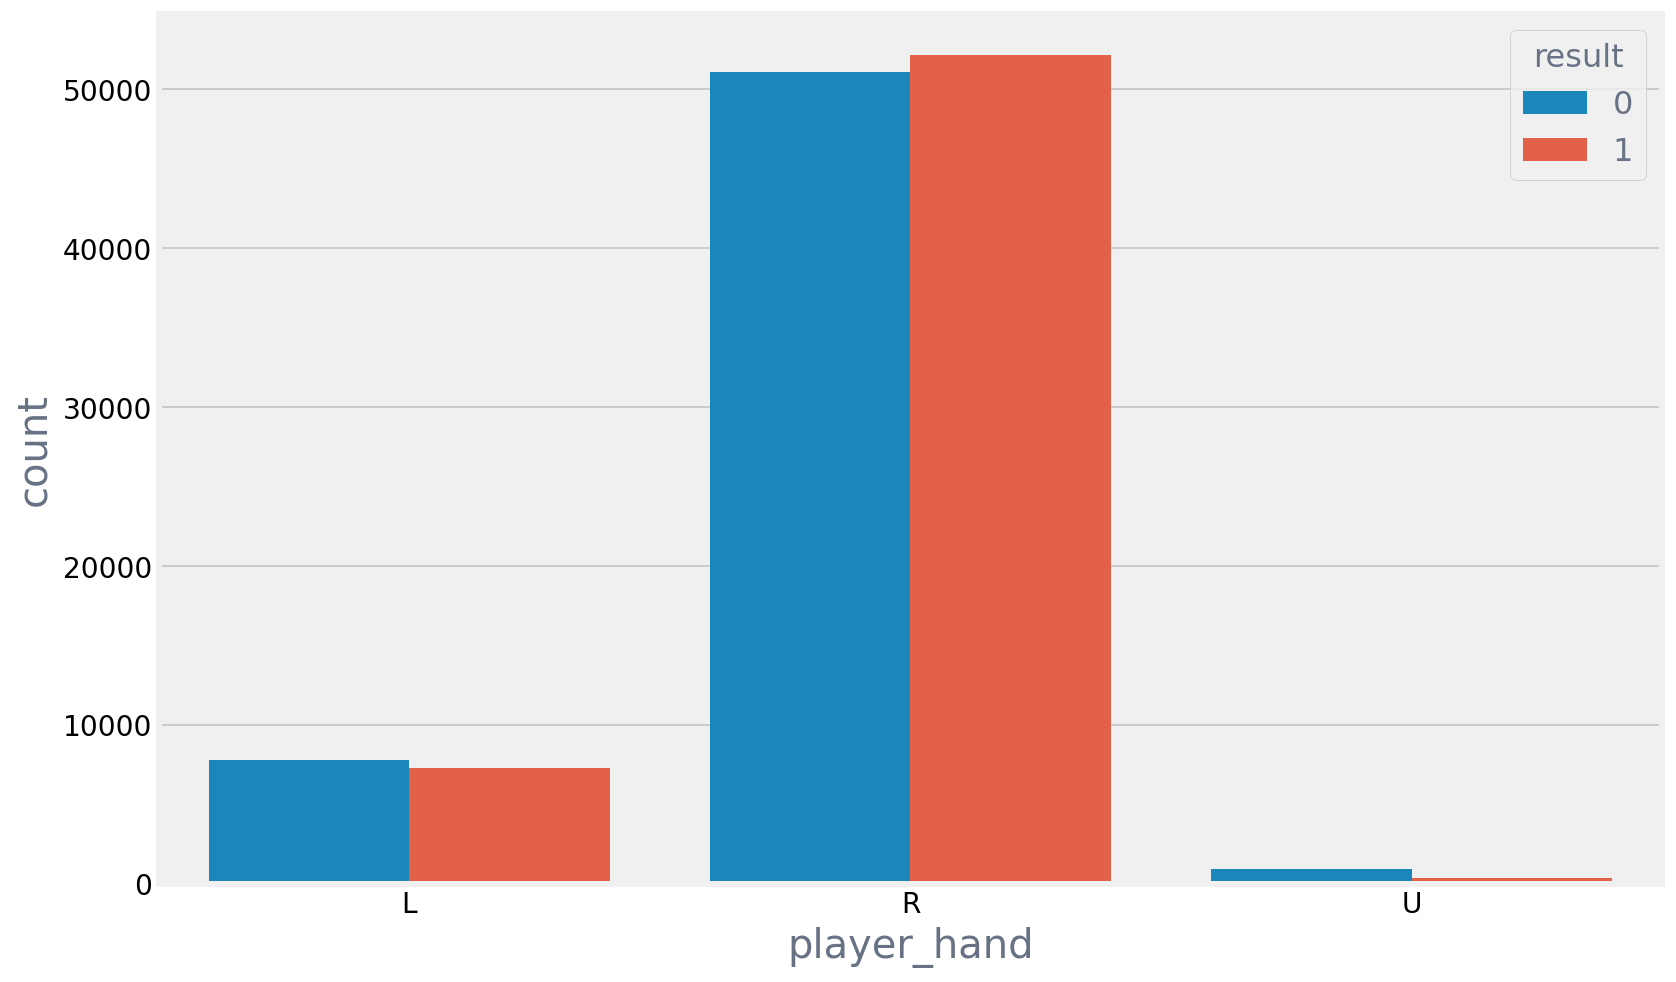

In [382]:
sns.countplot(x="player_hand",hue="result",data=atp)

In [383]:
atp.isnull().sum()

player_id                       0
player_seed                 80977
player_entry               112262
player_name                     0
player_hand                    48
player_ht                    6663
player_ioc                      0
player_age                      2
ace                         11112
df                          11112
svpt                        11112
1stIn                       11112
1stWon                      11112
2ndWon                      11112
SvGms                       11112
bpSaved                     11112
bpFaced                     11112
player_rank                  1730
player_rank_points           1730
tourney_id                      0
tourney_name                    0
surface                         0
draw_size                       0
tourney_level                   0
tourney_date                    0
match_num                       0
score                           0
best_of                         0
round                           0
minutes       

In [384]:
atp_clean=atp[atp.ace.notnull()]
atp_clean.isnull().sum()

player_id                       0
player_seed                 70347
player_entry               101203
player_name                     0
player_hand                    27
player_ht                    3015
player_ioc                      0
player_age                      0
ace                             0
df                              0
svpt                            0
1stIn                           0
1stWon                          0
2ndWon                          0
SvGms                           0
bpSaved                         0
bpFaced                         0
player_rank                   296
player_rank_points            296
tourney_id                      0
tourney_name                    0
surface                         0
draw_size                       0
tourney_level                   0
tourney_date                    0
match_num                       0
score                           0
best_of                         0
round                           0
minutes       

<AxesSubplot:>

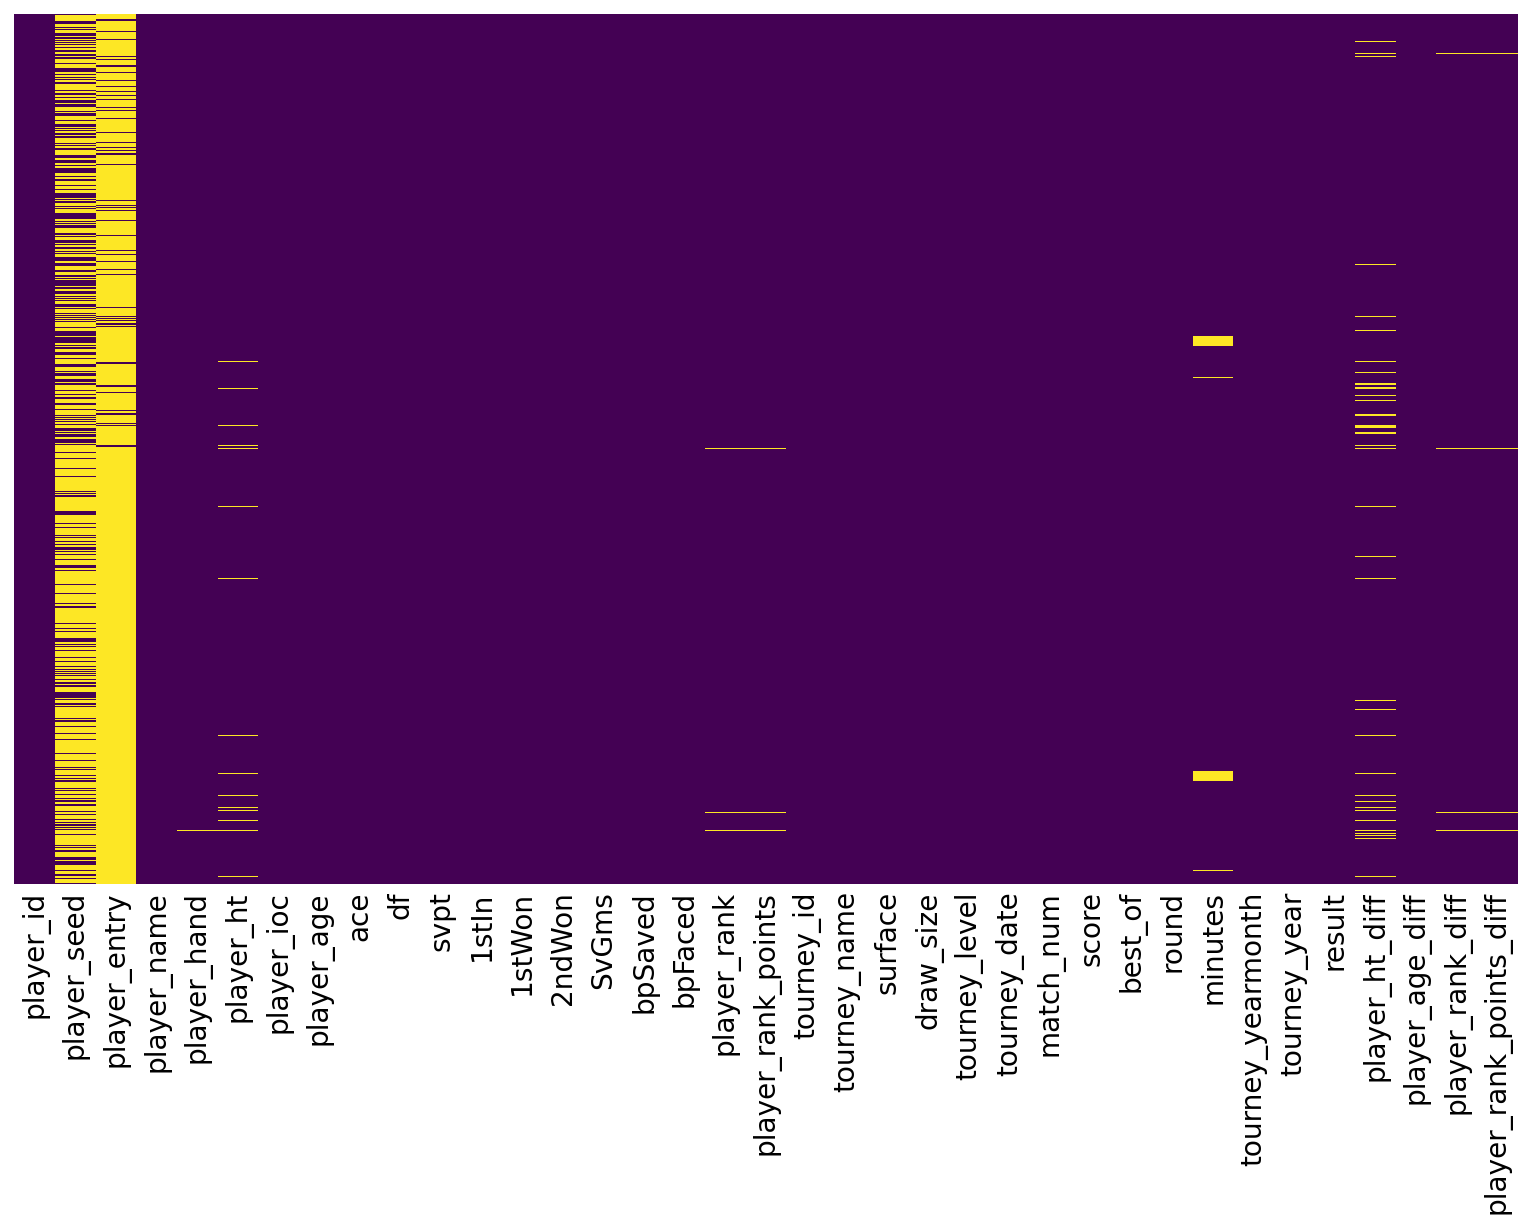

In [385]:
sns.heatmap(atp_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Feature Engineering

In [386]:
atp_clean.columns

Index(['player_id', 'player_seed', 'player_entry', 'player_name',
       'player_hand', 'player_ht', 'player_ioc', 'player_age', 'ace', 'df',
       'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'player_rank', 'player_rank_points', 'tourney_id', 'tourney_name',
       'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num',
       'score', 'best_of', 'round', 'minutes', 'tourney_yearmonth',
       'tourney_year', 'result', 'player_ht_diff', 'player_age_diff',
       'player_rank_diff', 'player_rank_points_diff'],
      dtype='object')

In [387]:
temp = pd.get_dummies(atp_clean.player_hand)
temp=temp.rename(columns={'L':'player_hand_l','R':'player_hand_r','U':'player_hand_u'})
temp.head()

,player_hand_l,player_hand_r,player_hand_u
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [388]:
temp1 = pd.get_dummies(atp_clean.surface)
temp1=temp1.rename(columns={'Carpet':'surface_carpet','Clay':'surface_clay','Grass':'surface_grass','Hard':'surface_hard'})
temp1.head()

,surface_carpet,surface_clay,surface_grass,surface_hard
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [389]:
temp2 = pd.get_dummies(atp_clean.tourney_level)
temp2=temp2.rename(columns={'A':'tourney_level_A','C':'tourney_level_C','D':'tourney_level_D','F':'tourney_level_F','G':'tourney_level_G','M':'tourney_level_M'})
temp2.head()

,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [390]:
atp_clean = pd.concat([atp_clean, temp, temp1, temp2], axis=1, join='outer')
atp_clean.columns 

Index(['player_id', 'player_seed', 'player_entry', 'player_name',
       'player_hand', 'player_ht', 'player_ioc', 'player_age', 'ace', 'df',
       'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'player_rank', 'player_rank_points', 'tourney_id', 'tourney_name',
       'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num',
       'score', 'best_of', 'round', 'minutes', 'tourney_yearmonth',
       'tourney_year', 'result', 'player_ht_diff', 'player_age_diff',
       'player_rank_diff', 'player_rank_points_diff', 'player_hand_l',
       'player_hand_r', 'player_hand_u', 'surface_carpet', 'surface_clay',
       'surface_grass', 'surface_hard', 'tourney_level_A', 'tourney_level_D',
       'tourney_level_F', 'tourney_level_G', 'tourney_level_M'],
      dtype='object')

In [391]:
atp_pre=atp_clean[['player_hand_l','player_hand_u',
                 'player_ht_diff','player_age_diff', 'player_rank_diff', 'player_rank_points_diff',
                 'surface_carpet', 'surface_clay','surface_grass','surface_hard',
                 'tourney_level_A','tourney_level_D', 'tourney_level_F', 'tourney_level_G','tourney_level_M','result']]
#'player_ht', 'player_age', 'player_rank', 'player_rank_points', 

In [392]:
atp_pre.columns

Index(['player_hand_l', 'player_hand_u', 'player_ht_diff', 'player_age_diff',
       'player_rank_diff', 'player_rank_points_diff', 'surface_carpet',
       'surface_clay', 'surface_grass', 'surface_hard', 'tourney_level_A',
       'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'result'],
      dtype='object')

<AxesSubplot:>

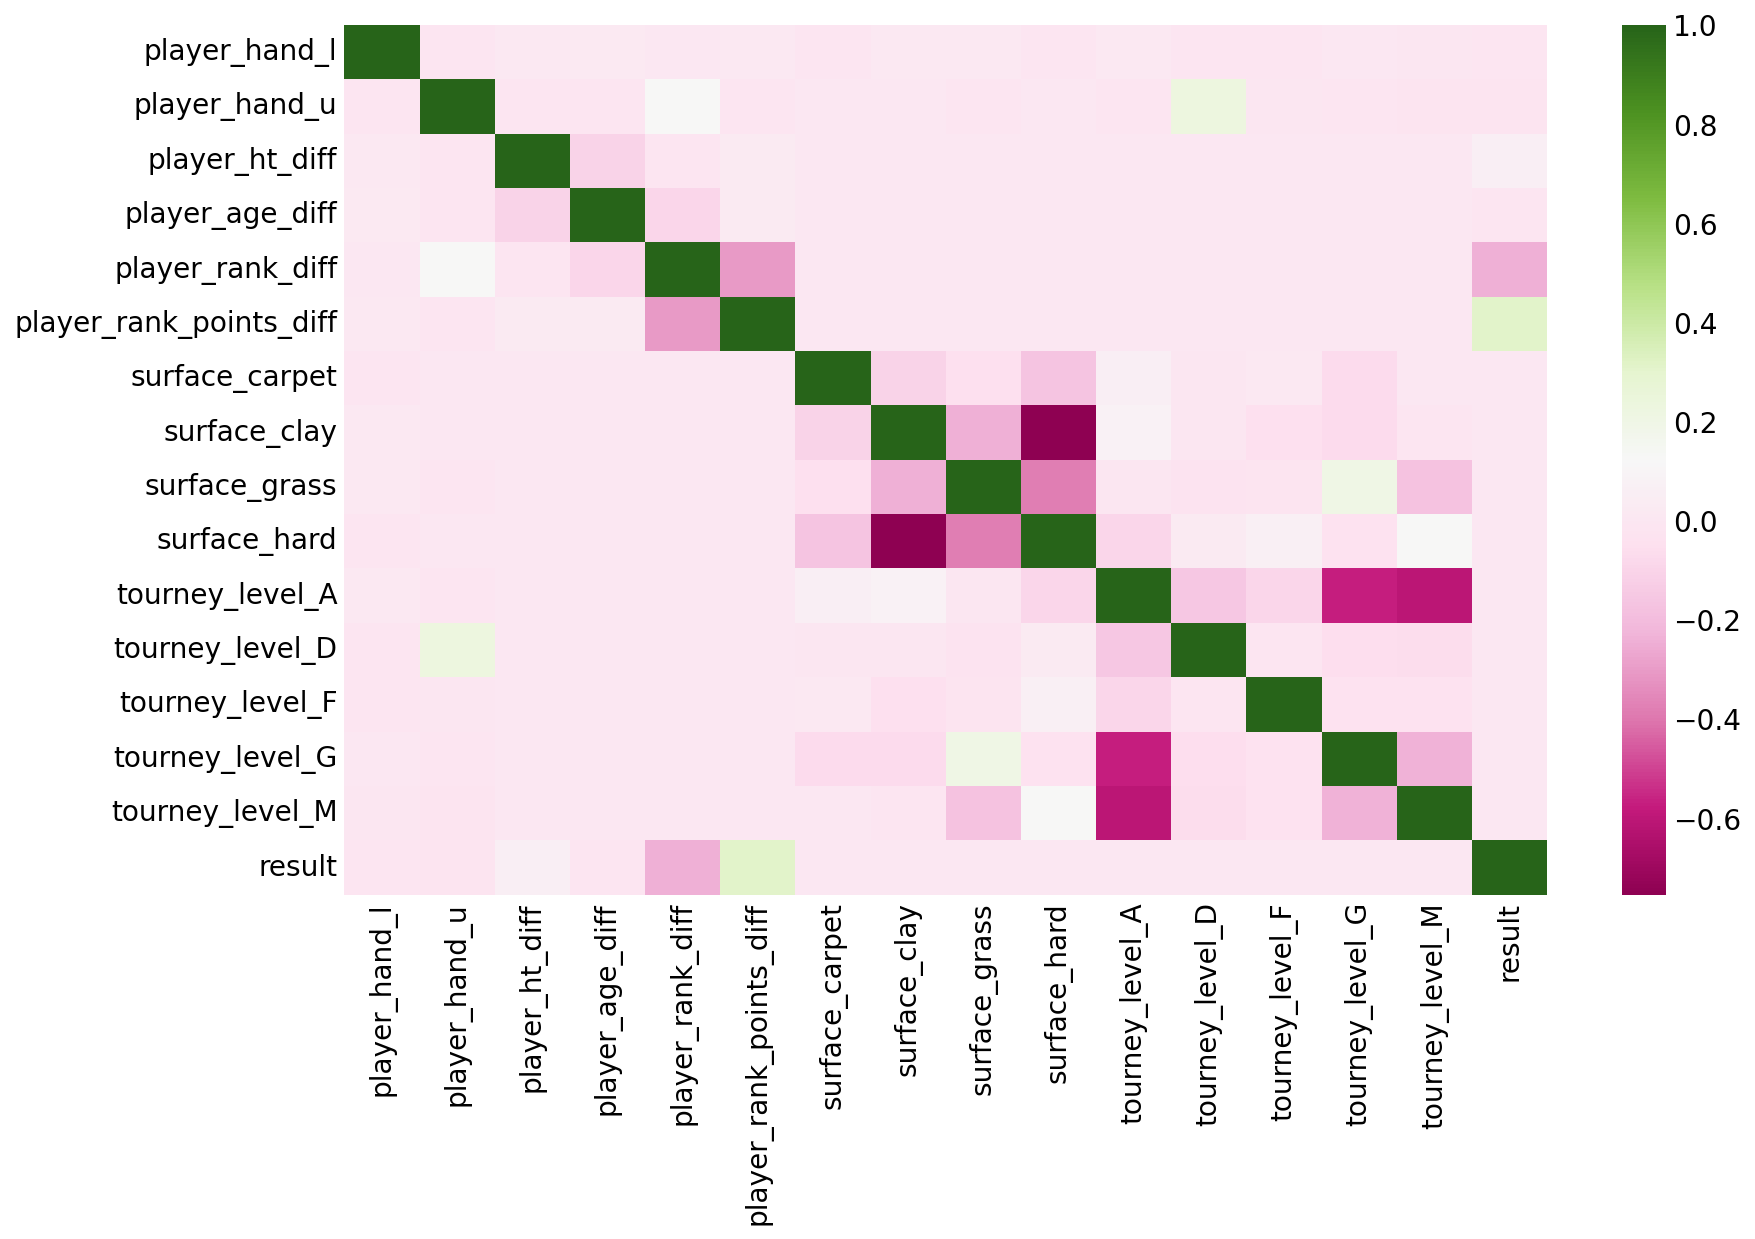

In [393]:
sns.heatmap(atp_pre.corr(),cmap="PiYG")

In [394]:
atp_pre.corr()

,player_hand_l,player_hand_u,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_carpet,surface_clay,surface_grass,surface_hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,result
player_hand_l,1.000000,-0.019224,1.035209e-02,1.635752e-02,1.960811e-03,7.984848e-03,-1.521955e-02,9.915160e-03,6.501865e-03,-8.696179e-03,9.594699e-03,-1.012449e-02,-1.194262e-02,-3.530300e-05,-6.208263e-03,-1.410208e-02
player_hand_u,-0.019224,1.000000,-8.583632e-03,-1.706120e-02,1.254474e-01,-1.145033e-02,-6.047161e-04,1.832683e-03,-8.600915e-03,3.845590e-03,-2.053893e-02,2.255885e-01,-3.969270e-03,-2.046272e-02,-2.506317e-02,-2.751681e-02
player_ht_diff,0.010352,-0.008584,1.000000e+00,-1.059412e-01,-1.852529e-02,2.297228e-02,3.920100e-17,2.435090e-16,-6.139824e-17,3.999876e-16,1.858603e-16,3.241681e-18,1.804113e-17,-1.760454e-16,1.175794e-16,5.533962e-02
player_age_diff,0.016358,-0.017061,-1.059412e-01,1.000000e+00,-9.356543e-02,2.228770e-02,1.276354e-18,2.375159e-17,-3.697483e-17,1.836090e-16,-1.462106e-16,-4.854140e-17,1.077791e-17,2.234479e-17,1.378449e-16,-1.725685e-02
player_rank_diff,0.001961,0.125447,-1.852529e-02,-9.356543e-02,1.000000e+00,-3.042839e-01,6.877961e-17,-3.417230e-16,4.992105e-16,-6.953670e-16,2.551766e-15,4.178892e-16,5.600069e-17,-1.556385e-17,-7.850759e-16,-2.461107e-01
player_rank_points_diff,0.007985,-0.011450,2.297228e-02,2.228770e-02,-3.042839e-01,1.000000e+00,-5.352599e-17,7.689522e-16,-5.506649e-16,1.130666e-15,-2.827678e-15,1.479362e-16,3.397381e-17,7.278470e-17,8.847176e-16,3.096245e-01
surface_carpet,-0.015220,-0.000605,3.920100e-17,1.276354e-18,6.877961e-17,-5.352599e-17,1.000000e+00,-1.081331e-01,-5.480120e-02,-1.714993e-01,5.292848e-02,-1.838033e-03,1.050043e-02,-7.454290e-02,5.761489e-03,-1.653058e-17
surface_clay,0.009915,0.001833,2.435090e-16,2.375159e-17,-3.417230e-16,7.689522e-16,-1.081331e-01,1.000000e+00,-2.410959e-01,-7.545051e-01,8.106050e-02,-3.483225e-03,-5.470272e-02,-7.026395e-02,-1.955268e-02,2.032607e-15
surface_grass,0.006502,-0.008601,-6.139824e-17,-3.697483e-17,4.992105e-16,-5.506649e-16,-5.480120e-02,-2.410959e-01,1.000000e+00,-3.823785e-01,-3.053061e-03,-3.291862e-02,-2.772300e-02,2.009075e-01,-1.750514e-01,-2.259497e-15
surface_hard,-0.008696,0.003846,3.999876e-16,1.836090e-16,-6.953670e-16,1.130666e-15,-1.714993e-01,-7.545051e-01,-3.823785e-01,1.000000e+00,-9.043142e-02,2.442428e-02,6.545455e-02,-3.681692e-02,1.260741e-01,-1.759100e-15


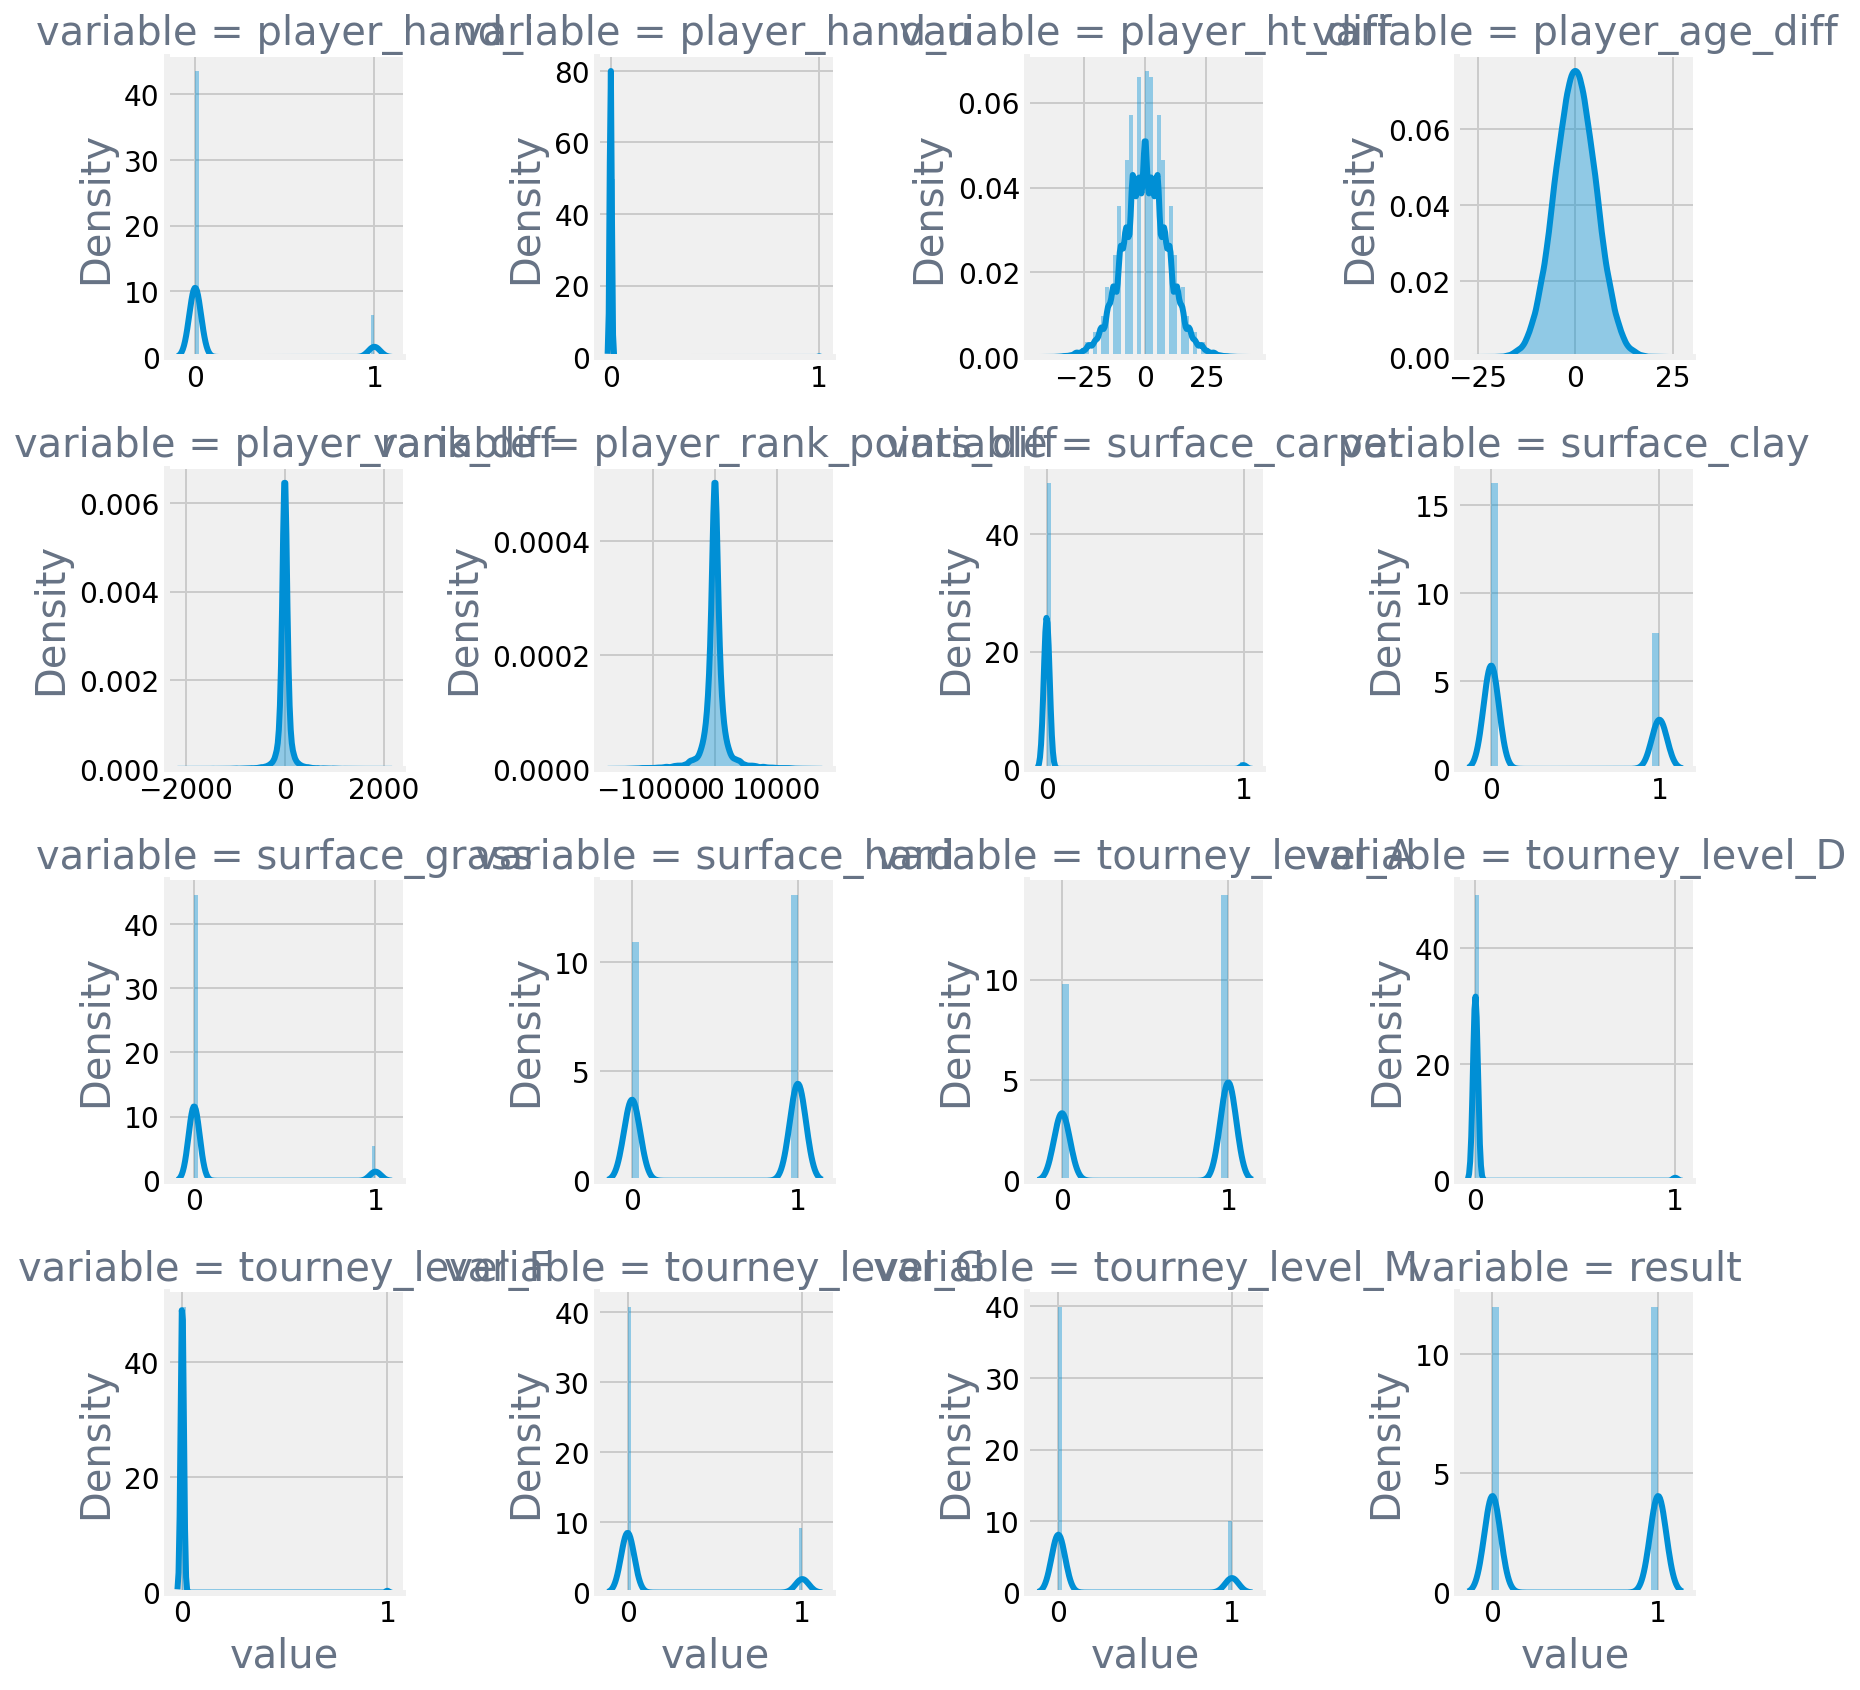

In [395]:
num = atp_pre.select_dtypes(include=[np.number])
g = sns.FacetGrid(pd.melt(atp_pre, value_vars = num.columns), col='variable', col_wrap=4, sharex=False, sharey = False)
g.map(sns.distplot, 'value')

In [396]:
atp_pre_dropna = atp_pre.dropna(axis=0, how='any')
atp_pre_dropna.describe()

,player_hand_l,player_hand_u,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_carpet,surface_clay,surface_grass,surface_hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,result
count,102734.000000,102734.000000,102734.000000,1.027340e+05,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000,102734.000000
mean,0.128283,0.000214,0.000000,-7.746295e-18,0.000000,0.000000,0.024919,0.320400,0.109487,0.545194,0.592092,0.008118,0.006424,0.185839,0.207526,0.500000
std,0.334406,0.014632,9.466193,5.230480e+00,118.950478,2207.627687,0.155878,0.466633,0.312250,0.497956,0.491448,0.089734,0.079895,0.388979,0.405538,0.500002
min,0.000000,0.000000,-41.000000,-2.592197e+01,-1815.000000,-16641.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-5.000000,-3.540041e+00,-39.000000,-564.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,5.000000,3.540041e+00,39.000000,564.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,41.000000,2.592197e+01,1815.000000,16641.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [397]:
atp_pre_dropna.drop(['player_hand_l','player_hand_u', 'surface_carpet','tourney_level_D','tourney_level_F'],axis=1).to_csv("train_data")

In [398]:
#X = atp_pre_dropna.drop(['result'], axis=1)a
X = atp_pre_dropna.drop(['player_hand_l','player_hand_u', 'surface_carpet','tourney_level_D','tourney_level_F','result'],axis=1)
y = atp_pre_dropna['result']
X.head()

,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_clay,surface_grass,surface_hard,tourney_level_A,tourney_level_G,tourney_level_M
0,-8.0,-1.366188,38.0,-843.0,0,0,1,1,0,0
1,7.0,3.252567,-11.0,118.0,0,0,1,1,0,0
2,8.0,4.087611,-187.0,446.0,0,0,1,1,0,0
3,-13.0,4.109514,-14.0,205.0,0,0,1,1,0,0
4,7.0,2.351814,-34.0,429.0,0,0,1,1,0,0


In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Logistic Regression

In [400]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [401]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logreg, X, y, cv=10,scoring='accuracy')
accuracy
cross_val_score(logreg, X, y, cv=10,scoring='accuracy').mean()

0.651897449198872

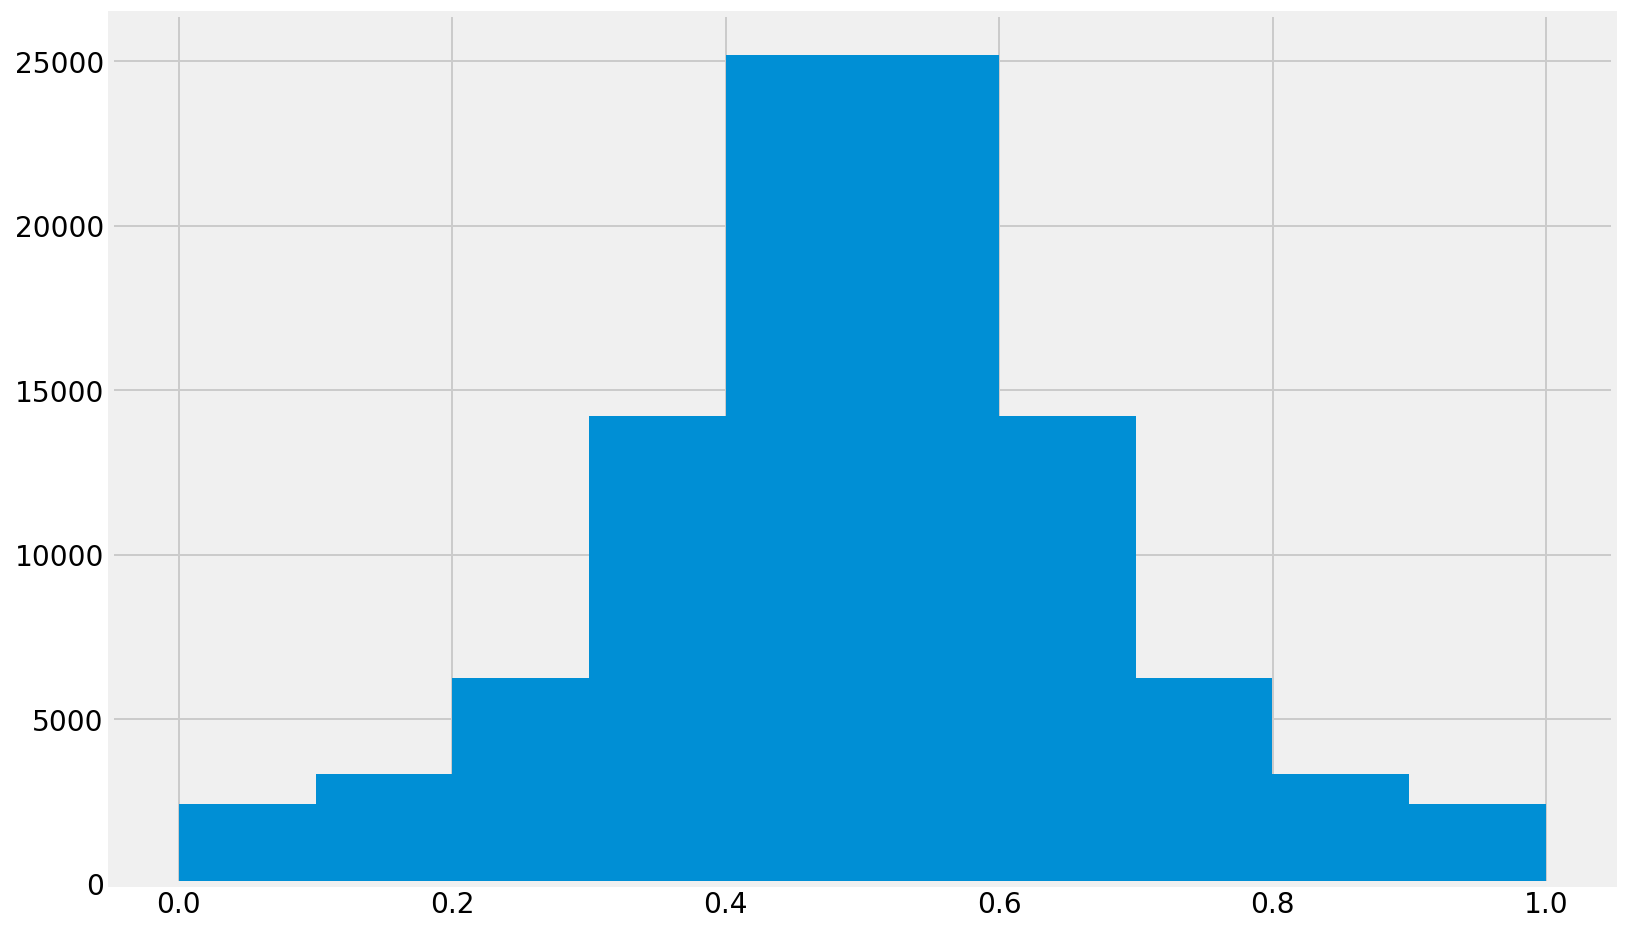

In [402]:
import matplotlib.pyplot as plt 
logreg.fit(X,y)
probs = logreg.predict_proba(X)[:, 1] 
plt.hist(probs) 
plt.show()

In [403]:
# use 0.5 cutoff for predicting 'default' 
import numpy as np 
preds = np.where(probs > 0.5, 1, 0) 
print (ConfusionMatrix(list(y), list(preds)))

  |     0     1 |
--+-------------+
0 |<33484>17883 |
1 | 17883<33484>|
--+-------------+
(row = reference; col = test)



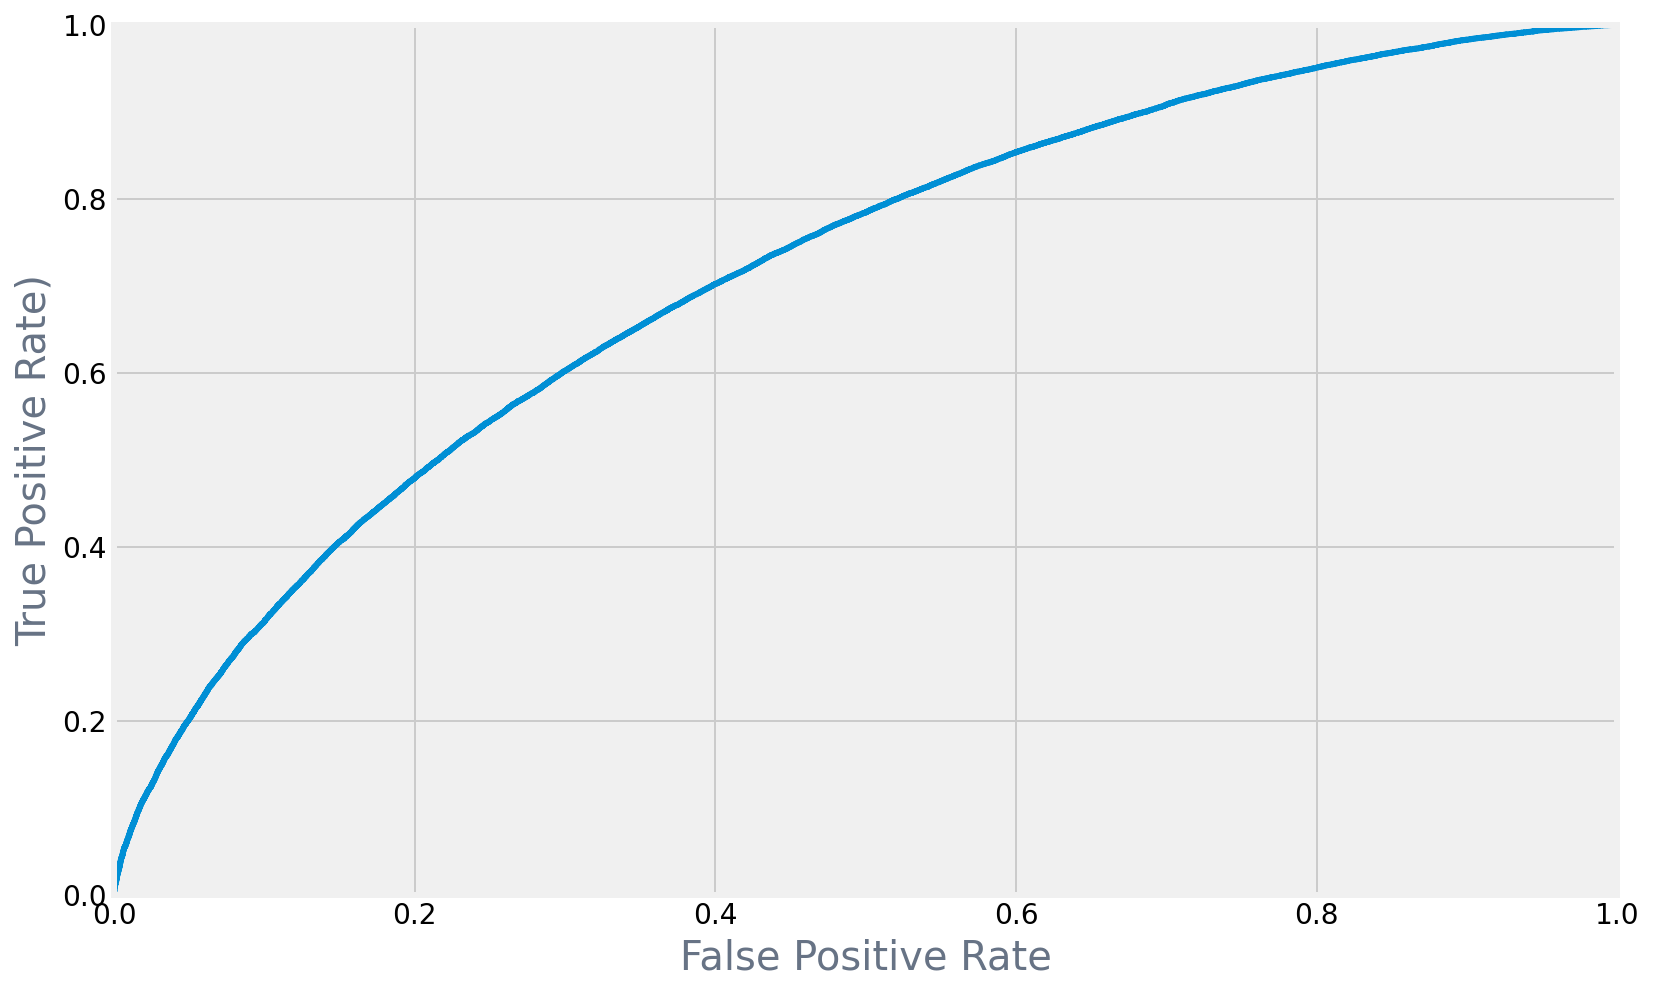

In [404]:
#ROC CURVES and AUC 
# plot ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [405]:
# calculate AUC 
print (metrics.roc_auc_score(y, probs))

0.7127422448163523


# Decision Tree

In [406]:
from sklearn.tree import DecisionTreeClassifier

In [407]:
dtree = DecisionTreeClassifier()

In [408]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree, X, y, cv=10,scoring='accuracy')
accuracy
cross_val_score(dtree, X, y, cv=10,scoring='accuracy').mean()

0.5645165879414886

# Random Forest

In [409]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3,5,7],
              'n_estimators':[3,5,10,20,30,40],
              'criterion': ['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
rfc = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=4)

rfc.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=3;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=3;, score=0.652 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=3;, score=0.651 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=3;, score=0.651 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=3;, score=0.648 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=5;, score=0.654 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=5;, score=0.652 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=5;, score=0.651 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=5;, score=0.650 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=5;, score=0.649 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth

[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=3;, score=0.653 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=3;, score=0.650 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=3;, score=0.650 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=3;, score=0.648 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=5;, score=0.654 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=5;, score=0.652 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=5;, score=0.652 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=5;, score=0.650 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=5;, score=0.648 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.655 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=10;, score=

[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=40;, score=0.649 total time=   3.0s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [3, 5, 10, 20, 30, 40]},
             verbose=4)

In [410]:
print("Best score: %s" % (rfc.best_score_))
print("Best parameter set: %s" % (rfc.best_params_))

Best score: 0.6535691109669045
Best parameter set: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 40}


In [411]:
from sklearn.metrics import classification_report,confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
accuracy=confusion_matrix(y_test,rfc_pred).trace()/confusion_matrix(y_test,rfc_pred).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[3367 1765]
 [1837 3305]]
Accuracy: 64.94%
